# Analysis

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, stats, shapiro
from scipy import stats
import matplotlib.transforms as transforms
from matplotlib.gridspec import GridSpec

## Gene Selection

In [2]:
genes = [
    'Acnat2',
    'Cisd1', 'Cmas', 'Cnot6l',
    'Dmd', 'Dnajb14', 
    'Echs1', 'Ergic2', 
    'Fabp2', 
    'Gatb', 'Gstm1',
    'Kansl1l',  
    'Slc6a15', 'Sytl4',
    'Uggt2', 
    'Zfp280d']


## Metadata

In [6]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
metadata = None
for gene in genes:
    path = os.path.join(gene, gene + '_manual_annotation.csv')
    new = pd.read_csv(path)
    new['study'] = gene
    if metadata is None:
        metadata = new
    else:
        metadata = pd.concat([metadata, new])
        
#metadata['mouse_id'] = metadata['mouse_id'].astype(np.int32)
#metadata['cohort_id'] = metadata['cohort_id'].astype(np.int32)
#metadata['bw'] = metadata['bw'].astype(float)
#metadata = metadata[['mouse_id', 'strain', 'genotype', 'sex', 'type', 'bw', 'study']]
metadata.set_index('mouse_id',inplace=True, drop = True)
metadata

,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,study
mouse_id,,,,,,,,,,
30514213,C57BL/6N,m,mutant,het (Acnat2),23.8,78.47,45.49,2.81,1.59,Acnat2
30514214,C57BL/6N,m,control,wt (Acnat2),29.4,85.84,53.84,3.06,1.40,Acnat2
30514215,C57BL/6N,m,mutant,het (Acnat2),28.7,63.80,34.05,3.74,2.48,Acnat2
30514216,C57BL/6N,m,control,wt (Acnat2),28.1,91.82,62.17,2.63,0.94,Acnat2
30514222,C57BL/6N,m,mutant,het (Acnat2),24.6,90.19,59.23,2.61,1.08,Acnat2
...,...,...,...,...,...,...,...,...,...,...
30520113,C57BL/6N,m,control,wt (Uggt2),26.9,69.77,38.52,3.71,2.25,Zfp280d
30520118,C57BL/6N,f,control,wt (Uggt2),22.1,83.12,50.37,3.03,1.44,Zfp280d
30520129,C57BL/6N,f,control,wt (Uggt2),19.3,91.72,61.50,2.29,0.97,Zfp280d


In [7]:
metadata.describe()

,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
count,671.000000,671.000000,671.000000,671.000000,671.000000
mean,24.388376,85.538197,54.757437,2.784501,1.312787
std,3.132371,8.767520,9.463457,0.417743,0.458659
min,18.300000,36.250000,17.390000,1.750000,0.590000
25%,21.900000,81.765000,48.655000,2.530000,1.010000
50%,23.900000,88.170000,56.630000,2.710000,1.200000
75%,26.700000,91.720000,61.635000,3.010000,1.500000
max,34.000000,97.630000,75.930000,4.560000,3.580000


In [8]:
agg = metadata.groupby(by = ['mouse_id', 'genotype']).mean()
agg.reset_index(inplace=True)
agg.groupby(by = 'genotype').count()

,mouse_id,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
genotype,,,,,,
control,245,245,245,245,245,245
mutant,275,275,275,275,275,275


In [9]:
metadata.groupby(by = ['study', 'sex', 'genotype']).agg(['mean','count'])#.to_latex()

bw        EF_manual        FS_manual        \
                           mean count       mean count       mean count   
study   sex genotype                                                      
Acnat2  f   control   21.762500     8  88.940000     8  58.761250     8   
            mutant    21.650000     8  89.437500     8  58.370000     8   
        m   control   26.825000     8  87.588750     8  56.892500     8   
            mutant    27.625000     8  84.070000     8  52.863750     8   
Cisd1   f   control   22.451724    29  86.957586    29  56.681034    29   
...                         ...   ...        ...   ...        ...   ...   
Uggt2   m   mutant    26.360000    10  89.862000    10  59.648000    10   
Zfp280d f   control   22.246667    15  88.468667    15  57.988667    15   
            mutant    21.750000     8  77.152500     8  44.898750     8   
        m   control   26.970588    17  86.555294    17  55.348824    17   
            mutant    23.980000    10  56.457000    10  29.307000    10   

                     LVIDd_manual       LVIDs_manual        
                             mean count         mean count  
study   sex genotype                                        
Acnat2  f   control      2.581250     8     1.120000     8  
            mutant       2.421250     8     1.010000     8  
        m   control      2.621250     8     1.168750     8  
            mutant       2.836250     8     1.385000     8  
Cisd1   f   control      2.728621    29     1.253448    29  
...                           ...   ...          ...   ...  
Uggt2   m   mutant       2.656000    10     1.098000    10  
Zfp280d f   control      2.692667    15     1.151333    15  
            mutant       2.973750     8     1.666250     8  
        m   control      2.730000    17     1.276471    17  
            mutant       3.546000    10     2.576000    10  

[64 rows x 10 columns]

In [10]:
metadata[['bw']].describe()

,bw
count,671.000000
mean,24.388376
std,3.132371
min,18.300000
25%,21.900000
50%,23.900000
75%,26.700000
max,34.000000


## Image quality

In [13]:
filenames =[] 
for gene in genes:
    imq = os.path.join(gene, gene + '_image_quality_per_line.csv')
    if filenames  is None:
        filenames = [imq]
    else: 
        filenames = np.append(filenames,imq)
print(filenames)

['Acnat2/Acnat2_image_quality_per_line.csv'
 'Cisd1/Cisd1_image_quality_per_line.csv'
 'Cmas/Cmas_image_quality_per_line.csv'
 'Cnot6l/Cnot6l_image_quality_per_line.csv'
 'Dmd/Dmd_image_quality_per_line.csv'
 'Dnajb14/Dnajb14_image_quality_per_line.csv'
 'Echs1/Echs1_image_quality_per_line.csv'
 'Ergic2/Ergic2_image_quality_per_line.csv'
 'Fabp2/Fabp2_image_quality_per_line.csv'
 'Gatb/Gatb_image_quality_per_line.csv'
 'Gstm1/Gstm1_image_quality_per_line.csv'
 'Kansl1l/Kansl1l_image_quality_per_line.csv'
 'Slc6a15/Slc6a15_image_quality_per_line.csv'
 'Sytl4/Sytl4_image_quality_per_line.csv'
 'Uggt2/Uggt2_image_quality_per_line.csv'
 'Zfp280d/Zfp280d_image_quality_per_line.csv']


In [14]:
image_quality_csv = pd.concat([pd.read_csv(f) for f in filenames ])
image_quality_csv.rename(columns={'Unnamed: 0': 'Study'}, inplace=True)
image_quality_csv.reset_index(inplace=True, drop = True)

In [15]:
image_quality_csv

,Study,high image quality,low image quality
0,Acnat2,62.25,37.75
1,Cisd1,49.13,50.87
2,Cmas,48.13,51.87
3,Cnot6l,56.68,43.32
4,Dmd,42.06,57.94
5,Dnajb14,43.26,56.74
6,Echs1,40.30,59.70
7,Ergic2,45.56,54.44
8,Fabp2,50.80,49.20
9,Gatb,56.20,43.80


In [16]:
image_quality_csv.describe()

,high image quality,low image quality
count,16.000000,16.000000
mean,49.858125,50.141875
std,7.190558,7.190558
min,38.160000,37.750000
25%,44.985000,43.727500
50%,48.630000,51.370000
75%,56.272500,55.015000
max,62.250000,61.840000


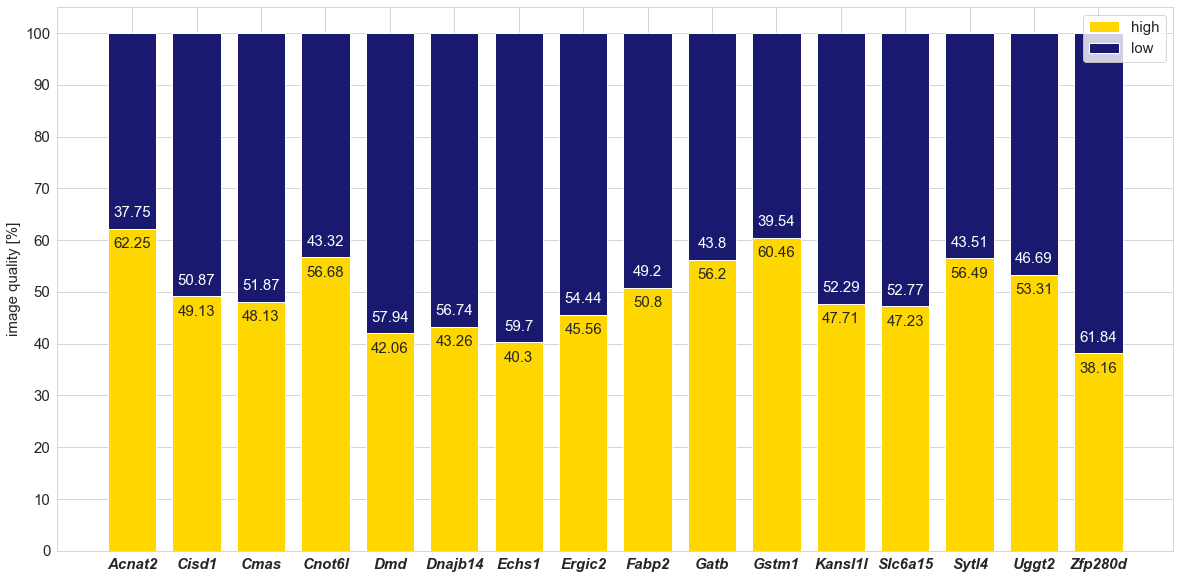

In [17]:
sns.set_style("whitegrid")
image_quality_csv.sort_values(by=['Study'], inplace = True)
labels = image_quality_csv['Study']
width = 0.75      # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20,10))

ax.bar(labels, image_quality_csv['high image quality'], width, label='high', color='gold')
ax.bar(labels, image_quality_csv['low image quality'], width, bottom = image_quality_csv['high image quality'], label='low', color='midnightblue')

ax.set_ylabel('image quality [%]', fontsize=15)
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
#ax.set_title('Image quality per line')
i = 0
for value in image_quality_csv['high image quality']:
    plt.text(x=labels[i] , y =value -3, s=f"{value}" , fontdict=dict(fontsize=15), va='center', ha='center')
    plt.text(x=labels[i] , y = 100 - image_quality_csv['low image quality'][i] + 3, s=f"{image_quality_csv['low image quality'][i]}" , fontdict=dict(fontsize=15), va='center', ha='center', c ='white')
    i = i+1
        
plt.xticks(fontsize=15, fontstyle = 'italic', fontweight = 'bold')
plt.yticks(fontsize=15)
ax.legend(fontsize=15)
plt.savefig('image_quality.png')

# Error distributions

In [18]:
error_dist = None
for gene in genes:
    print(gene)
    path = os.path.join(gene, gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')    
    new = pd.read_csv(path)
    new['study'] = gene
    if error_dist is None:
        error_dist = new
    else:
        error_dist = pd.concat([error_dist, new])

Acnat2
Cisd1
Cmas
Cnot6l
Dmd
Dnajb14
Echs1
Ergic2
Fabp2
Gatb
Gstm1
Kansl1l
Slc6a15
Sytl4
Uggt2
Zfp280d


In [19]:
error_dist.groupby(by = ['mouse_id', 'study']).mean()

,,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDs_auto_quality_label,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
mouse_id,study,,,,,,,,,,,,,,,,,,,,,,,
30502528,Cisd1,2.707027,2.671661,0.924545,2.717029,677.287219,2.671661,0.958653,0.962146,27.419107,1.794400,93.385668,65.774803,22.6,90.30,59.93,2.76,1.14,-0.052973,2.733514,-0.215455,1.032272,3.085668,5.844803
30502540,Cisd1,2.613418,2.625508,0.968568,2.666107,711.293719,2.625508,0.954481,0.958572,25.222942,2.213428,91.350659,63.009630,24.6,90.20,59.19,2.51,1.10,0.103418,2.561709,-0.131432,1.034284,1.150659,3.819630
30502568,Cisd1,2.639535,2.659509,0.984992,2.688101,693.372172,2.659509,0.974466,0.974697,26.018289,2.173422,91.527250,62.580983,22.5,93.73,65.39,2.59,0.89,0.049535,2.614767,0.094992,0.937496,-2.202750,-2.809017
30502570,Cisd1,2.650404,2.653841,1.261122,2.653152,642.345860,2.653841,0.839071,0.825223,27.114576,4.378089,82.151107,51.346916,29.4,85.83,53.62,2.70,1.31,-0.049596,2.675202,-0.048878,1.285561,-3.678893,-2.273084
30502712,Cisd1,2.671683,3.344657,1.158003,3.292827,702.761051,3.344657,0.915388,0.928478,26.617316,3.142634,88.023929,56.548782,31.2,81.84,48.72,2.68,1.36,-0.008317,2.675841,-0.201997,1.259001,6.183929,7.828782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30523148,Dnajb14,2.864408,3.065833,1.747181,3.050072,629.037685,3.065833,0.860722,0.860722,32.549146,9.604326,67.040215,37.848075,21.1,61.26,32.20,3.68,2.53,-0.815592,3.272204,-0.782819,2.138591,5.780215,5.648075
30523149,Dnajb14,2.640066,1.784783,1.602705,1.766558,595.957758,1.784783,0.790481,0.798704,26.846333,7.779520,66.347032,37.710024,18.9,73.30,40.93,3.04,1.76,-0.399934,2.840033,-0.157295,1.681352,-6.952968,-3.219976
30523150,Dnajb14,2.740483,2.548737,1.126770,2.540619,662.930592,2.548737,0.959130,0.957625,28.416856,3.025786,89.413357,58.902315,21.7,85.49,53.18,2.80,1.38,-0.059517,2.770242,-0.253230,1.253385,3.923357,5.722315


In [20]:
# Log Transformation and calculation of the differences

log_transform_all = error_dist.groupby(by=['mouse_id', 'study']).mean()
log_transform_all = log_transform_all[['LVIDd_auto', 'LVIDs_auto', 'LVIDd_manual', 'LVIDs_manual']]
log_transform_all = np.log10(log_transform_all)
log_transform_all.reset_index(inplace=True)
log_transform_all['dif_LVIDd'] = [(log_transform_all['LVIDd_auto'][i] - log_transform_all['LVIDd_manual'][i]) for i in np.arange(len(log_transform_all))]
log_transform_all['dif_LVIDs'] = [(log_transform_all['LVIDs_auto'][i] - log_transform_all['LVIDs_manual'][i]) for i in np.arange(len(log_transform_all))]

log_transform_all['mean_LVIDd'] = [((log_transform_all['LVIDd_auto'][i] + log_transform_all['LVIDd_manual'][i]) / 2) for i in np.arange(len(log_transform_all))]
log_transform_all['mean_LVIDs'] = [((log_transform_all['LVIDs_auto'][i] + log_transform_all['LVIDs_manual'][i]) / 2) for i in np.arange(len(log_transform_all))]

log_transform_all

,mouse_id,study,LVIDd_auto,LVIDs_auto,LVIDd_manual,LVIDs_manual,dif_LVIDd,dif_LVIDs,mean_LVIDd,mean_LVIDs
0,30502528,Cisd1,0.432493,-0.034072,0.440909,0.056905,-0.008416,-0.090977,0.436701,0.011416
1,30502540,Cisd1,0.417209,-0.013870,0.399674,0.041393,0.017535,-0.055262,0.408441,0.013761
2,30502568,Cisd1,0.421527,-0.006567,0.413300,-0.050610,0.008228,0.044043,0.417414,-0.028589
3,30502570,Cisd1,0.423312,0.100757,0.431364,0.117271,-0.008052,-0.016514,0.427338,0.109014
4,30502712,Cisd1,0.426785,0.063710,0.428135,0.133539,-0.001350,-0.069829,0.427460,0.098624
...,...,...,...,...,...,...,...,...,...,...
663,30523148,Dnajb14,0.457035,0.242338,0.565848,0.403121,-0.108813,-0.160782,0.511441,0.322729
664,30523149,Dnajb14,0.421615,0.204854,0.482874,0.245513,-0.061259,-0.040659,0.452244,0.225183
665,30523150,Dnajb14,0.437827,0.051835,0.447158,0.139879,-0.009331,-0.088044,0.442493,0.095857
666,30523151,Dnajb14,0.439832,0.049576,0.457882,0.184691,-0.018049,-0.135116,0.448857,0.117134


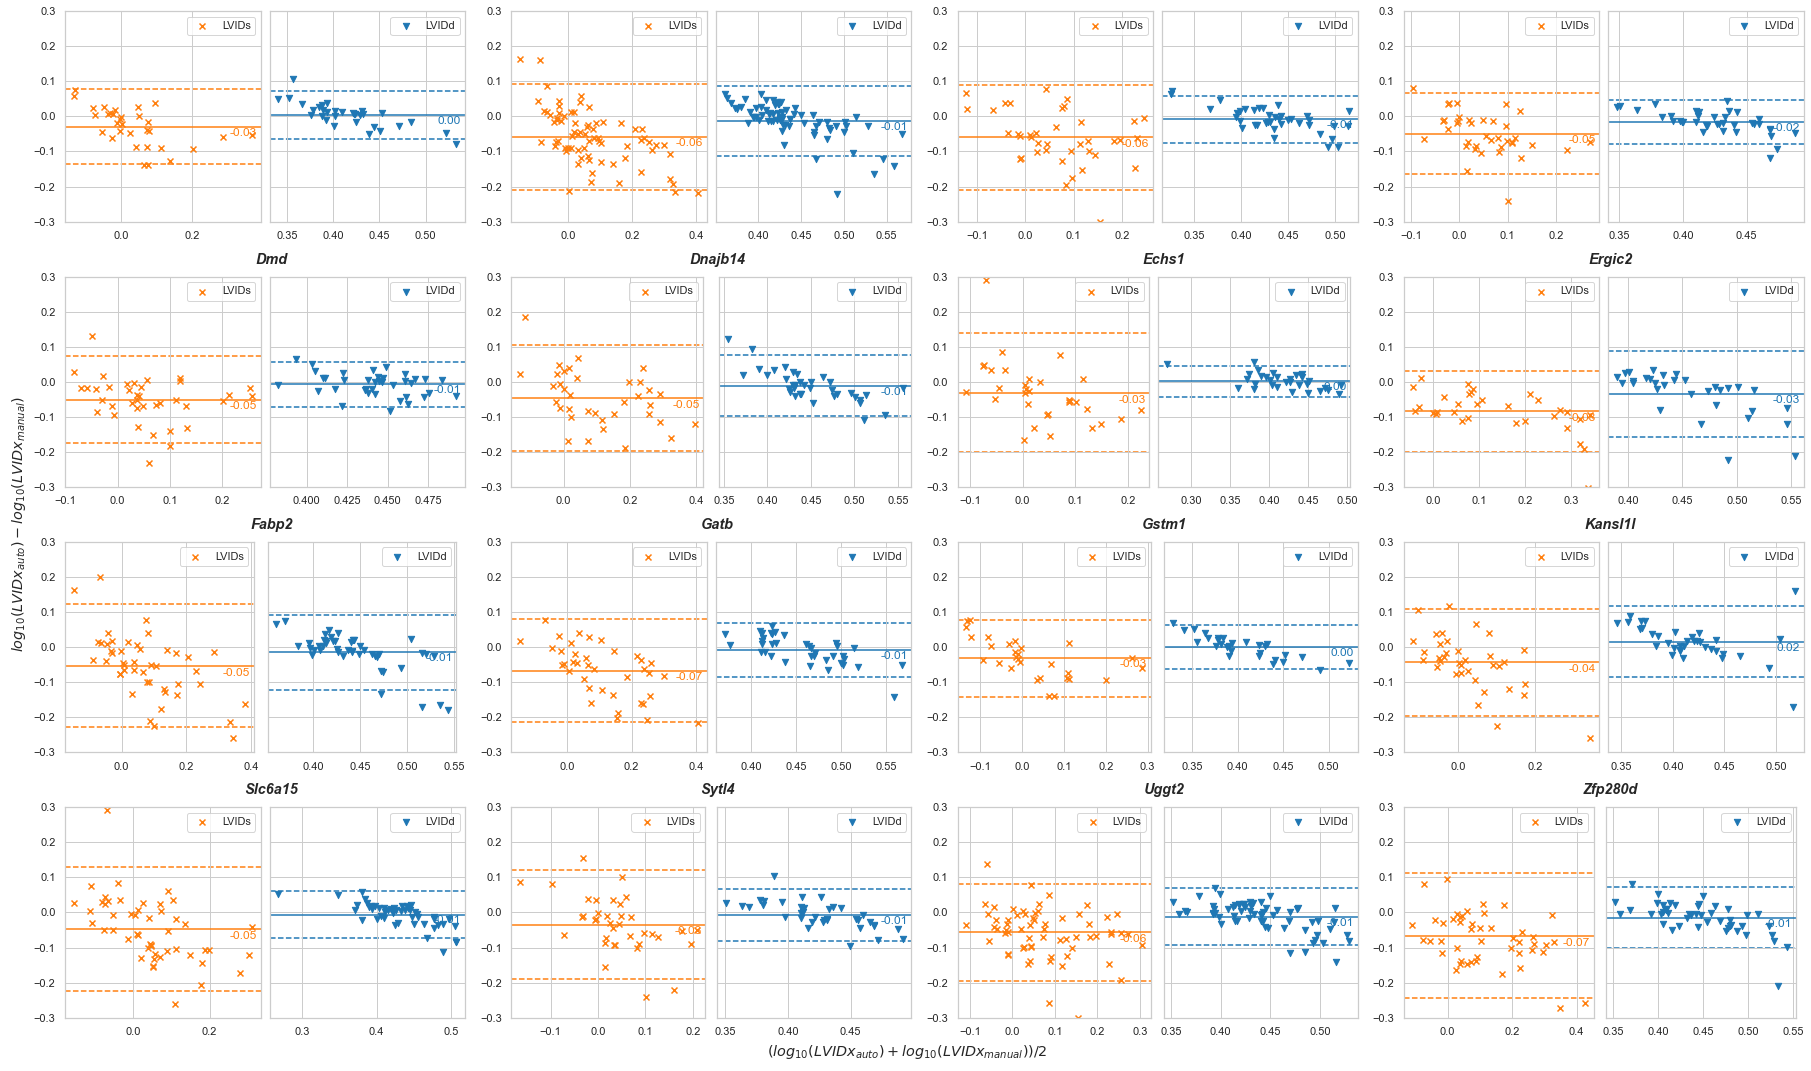

In [21]:
#sns.set_style("whitegrid")
sns.set(font_scale=1, style='whitegrid')

figure = plt.figure(figsize=(25,15), constrained_layout=True)
subfigures = figure.subfigures(4,4, wspace = 0.02, hspace = 0.02)
y_min = -0.3
y_max = 0.3

counter = 0
for i in range(4):
    for j in range(4):
        if counter==16:
            break
        #print(genes[counter])
        
        # Calculate mean of every single mouse 
        log_data = error_dist[error_dist['study'] == genes[counter]].groupby(by = ['mouse_id']).mean()
        log_data = log_data[['LVIDd_auto', 'LVIDs_auto', 'LVIDd_manual', 'LVIDs_manual']]
        log_data = np.log10(log_data)
        log_data.reset_index(inplace=True)       
        # Calculate absolute difference between automatic and manual
        log_data['log_dif_LVIDd'] = [(log_data['LVIDd_auto'][i] - log_data['LVIDd_manual'][i]) for i in np.arange(len(log_data))]
        log_data['log_dif_LVIDs'] = [(log_data['LVIDs_auto'][i] - log_data['LVIDs_manual'][i]) for i in np.arange(len(log_data))]
        
        # Calculate mean value of both measurement methods
        log_data['avg_LVIDd'] = [((log_data['LVIDd_auto'][i] + log_data['LVIDd_manual'][i]) / 2) for i in np.arange(len(log_data))]
        log_data['avg_LVIDs'] = [((log_data['LVIDs_auto'][i] + log_data['LVIDs_manual'][i]) / 2) for i in np.arange(len(log_data))]
        
        n = len(log_data)
        #print(log_data) 
        
        # Calculate stats
        mean_LVIDd = np.mean(log_data['log_dif_LVIDd'])
        mean_LVIDs = np.mean(log_data['log_dif_LVIDs'])

        std_LVIDd = np.std(log_data['log_dif_LVIDd'])       
        std_LVIDs = np.std(log_data['log_dif_LVIDs'])

        high_LVIDd = mean_LVIDd + 1.96 * std_LVIDd
        high_LVIDs = mean_LVIDs + 1.96 * std_LVIDs

        low_LVIDd = mean_LVIDd - 1.96 * std_LVIDd   
        low_LVIDs = mean_LVIDs - 1.96 * std_LVIDs

        mean_se_LVIDd = np.sqrt(std_LVIDd**2 / n)
        mean_se_LVIDs = np.sqrt(std_LVIDs**2 / n)

        high_low_se_LVIDd = np.sqrt(3 * std_LVIDd**2 / n)
        high_low_se_LVIDs = np.sqrt(3 * std_LVIDs**2 / n)

        ci_mean_LVIDd = stats.t.interval(0.95, n-1, loc=mean_LVIDd, scale=mean_se_LVIDd)
        ci_mean_LVIDs = stats.t.interval(0.95, n-1, loc=mean_LVIDs, scale=mean_se_LVIDs)

        ci_high_LVIDd = stats.t.interval(0.95, n-1, loc=high_LVIDd, scale=high_low_se_LVIDd)
        ci_high_LVIDs = stats.t.interval(0.95, n-1, loc=high_LVIDs, scale=high_low_se_LVIDs)

        ci_low_LVIDd = stats.t.interval(0.95, n-1, loc=low_LVIDd, scale=high_low_se_LVIDd)
        ci_low_LVIDs = stats.t.interval(0.95, n-1, loc=low_LVIDs, scale=high_low_se_LVIDd)
        
        # Plotting
        subfigures[i,j].suptitle(genes[counter], style = 'italic', x=0.55, fontweight='bold')
        axs = subfigures[i,j].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)
        
        axs[0].scatter(x=log_data['avg_LVIDs'], y=log_data['log_dif_LVIDs'], color = 'tab:orange', label = 'LVIDs', marker = 'x') 
        axs[1].scatter(x=log_data['avg_LVIDd'], y=log_data['log_dif_LVIDd'], color = 'tab:blue', label = 'LVIDd', marker = 'v', s=40)
        
        axs[0].axhline(y=mean_LVIDs, color= 'tab:orange', zorder=1)
        #axs[0].axhline(y=0, color = 'black', zorder=0, linestyle= 'dotted')
        axs[1].axhline(y=mean_LVIDd, color= 'tab:blue', zorder=1)
        #axs[1].axhline(y=0, color='black', zorder=0)
        
        
        # confidence intervals
        axs[0].axhline(y=high_LVIDs, color='tab:orange', linestyle= 'dashed', zorder=0)
        axs[1].axhline(y=high_LVIDd, color='tab:blue', linestyle= '--', zorder=0)

        axs[0].axhline(y=low_LVIDs, color='tab:orange', linestyle= 'dashed', zorder=0)
        axs[1].axhline(y=low_LVIDd, color='tab:blue', linestyle= '--', zorder=0)

        #axes[i,j].axhspan(ci_mean_LVIDd[0], ci_mean_LVIDd[1], facecolor='tab:grey', alpha=0.2)
        #axes[i,j+4].axhspan(ci_mean_LVIDs[0], ci_mean_LVIDs[1], facecolor='tab:grey', alpha=0.2)

        #axes[i,j].axhspan(ci_high_LVIDd[0], ci_high_LVIDd[1], facecolor='tab:blue', alpha=0.2)
        #axes[i,j+4].axhspan(ci_high_LVIDs[0], ci_high_LVIDs[1], facecolor='tab:blue', alpha=0.2)

        #axes[i,j].axhspan(ci_low_LVIDd[0], ci_low_LVIDd[1], facecolor='tab:blue', alpha=0.2)
        #axes[i,j+4].axhspan(ci_low_LVIDs[0], ci_low_LVIDs[1], facecolor='tab:blue', alpha=0.2)

        loa_range_LVIDd = high_LVIDd - low_LVIDd
        loa_range_LVIDs = high_LVIDs - low_LVIDs

        offset_LVIDd = (loa_range_LVIDd / 100.0) * 1.5
        offset_LVIDs = (loa_range_LVIDs / 100.0) * 1.5
        trans_LVIDd = transforms.blended_transform_factory(axs[1].transAxes, axs[1].transData)
        trans_LVIDs = transforms.blended_transform_factory(axs[0].transAxes, axs[0].transData)

        xloc = 0.98
                
        #axs[0].text(xloc, mean_LVIDs + offset_LVIDs, 'Mean', ha="right", va="bottom", transform=trans_LVIDs)
        axs[0].text(xloc, mean_LVIDs - offset_LVIDs, '%.2f' % mean_LVIDs, ha="right", va="top", transform=trans_LVIDs, color='tab:orange')
        #axs[0].text(xloc, high_LVIDs + offset_LVIDs, '+%.2f SD' % 1.96, ha="right", va="bottom", transform=trans_LVIDs)
        #axs[0].text(xloc, high_LVIDs - offset_LVIDs, '%.2f' % high_LVIDs, ha="right", va="top", transform=trans_LVIDs)
        #axs[0].text(xloc, low_LVIDs - offset_LVIDs, '-%.2f SD' % 1.96, ha="right", va="top", transform=trans_LVIDs)
        #axs[0].text(xloc, low_LVIDs + offset_LVIDs, '%.2f' % low_LVIDs, ha="right", va="bottom", transform=trans_LVIDs)
        
        #axs[1].text(xloc, mean_LVIDd + offset_LVIDd, 'Mean', ha="right", va="bottom", transform=trans_LVIDd)
        axs[1].text(xloc, mean_LVIDd - offset_LVIDd, '%.2f' % mean_LVIDd, ha="right", va="top", transform=trans_LVIDd, color='tab:blue')
        #axs[1].text(xloc, high_LVIDd + offset_LVIDd, '+%.2f SD' % 1.96, ha="right", va="bottom", transform=trans_LVIDd)
        #axs[1].text(xloc, high_LVIDd - offset_LVIDd, '%.2f' % high_LVIDd, ha="right", va="top", transform=trans_LVIDd)
        #axs[1].text(xloc, low_LVIDd - offset_LVIDd, '-%.2f SD' % 1.96, ha="right", va="top", transform=trans_LVIDd)
        #axs[1].text(xloc, low_LVIDd + offset_LVIDd, '%.2f' % low_LVIDd, ha="right", va="bottom", transform=trans_LVIDd)

       
        axs[0].legend()
        axs[1].legend()
        
        axs[0].set(ylim=(y_min, y_max))
        axs[1].set(ylim=(y_min, y_max))
            
        counter += 1
        

figure.supxlabel(r'$(log_{10}(LVIDx_{auto})+log_{10}({LVIDx_{manual}}))/2$')
figure.supylabel(r'$log_{10}(LVIDx_{auto}) - log_{10}({LVIDx_{manual}})$')
plt.savefig('BA_per_gene.png')

In [22]:
mean_error_dist = error_dist.groupby(by = ['mouse_id', 'study']).mean()
mean_error_dist.reset_index(inplace=True)
mean_error_dist

,mouse_id,study,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDs_auto_quality_label,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30502528,Cisd1,2.707027,2.671661,0.924545,2.717029,677.287219,2.671661,0.958653,0.962146,27.419107,1.794400,93.385668,65.774803,22.6,90.30,59.93,2.76,1.14,-0.052973,2.733514,-0.215455,1.032272,3.085668,5.844803
1,30502540,Cisd1,2.613418,2.625508,0.968568,2.666107,711.293719,2.625508,0.954481,0.958572,25.222942,2.213428,91.350659,63.009630,24.6,90.20,59.19,2.51,1.10,0.103418,2.561709,-0.131432,1.034284,1.150659,3.819630
2,30502568,Cisd1,2.639535,2.659509,0.984992,2.688101,693.372172,2.659509,0.974466,0.974697,26.018289,2.173422,91.527250,62.580983,22.5,93.73,65.39,2.59,0.89,0.049535,2.614767,0.094992,0.937496,-2.202750,-2.809017
3,30502570,Cisd1,2.650404,2.653841,1.261122,2.653152,642.345860,2.653841,0.839071,0.825223,27.114576,4.378089,82.151107,51.346916,29.4,85.83,53.62,2.70,1.31,-0.049596,2.675202,-0.048878,1.285561,-3.678893,-2.273084
4,30502712,Cisd1,2.671683,3.344657,1.158003,3.292827,702.761051,3.344657,0.915388,0.928478,26.617316,3.142634,88.023929,56.548782,31.2,81.84,48.72,2.68,1.36,-0.008317,2.675841,-0.201997,1.259001,6.183929,7.828782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,30523148,Dnajb14,2.864408,3.065833,1.747181,3.050072,629.037685,3.065833,0.860722,0.860722,32.549146,9.604326,67.040215,37.848075,21.1,61.26,32.20,3.68,2.53,-0.815592,3.272204,-0.782819,2.138591,5.780215,5.648075
664,30523149,Dnajb14,2.640066,1.784783,1.602705,1.766558,595.957758,1.784783,0.790481,0.798704,26.846333,7.779520,66.347032,37.710024,18.9,73.30,40.93,3.04,1.76,-0.399934,2.840033,-0.157295,1.681352,-6.952968,-3.219976
665,30523150,Dnajb14,2.740483,2.548737,1.126770,2.540619,662.930592,2.548737,0.959130,0.957625,28.416856,3.025786,89.413357,58.902315,21.7,85.49,53.18,2.80,1.38,-0.059517,2.770242,-0.253230,1.253385,3.923357,5.722315
666,30523151,Dnajb14,2.753167,2.541091,1.120923,2.508264,621.822468,2.541091,0.800509,0.783718,28.497231,3.045093,89.345871,59.300321,21.0,81.02,48.12,2.87,1.53,-0.116833,2.811583,-0.409077,1.325462,8.325871,11.180321


In [23]:
mean_error_dist[['dif_LVIDd', 'dif_LVIDs']].describe()

,dif_LVIDd,dif_LVIDs
count,668.000000,668.000000
mean,-0.074989,-0.174435
std,0.302694,0.259996
min,-1.757598,-1.598605
25%,-0.180692,-0.279782
50%,-0.021362,-0.134163
75%,0.100351,-0.016420
max,1.229671,0.625069


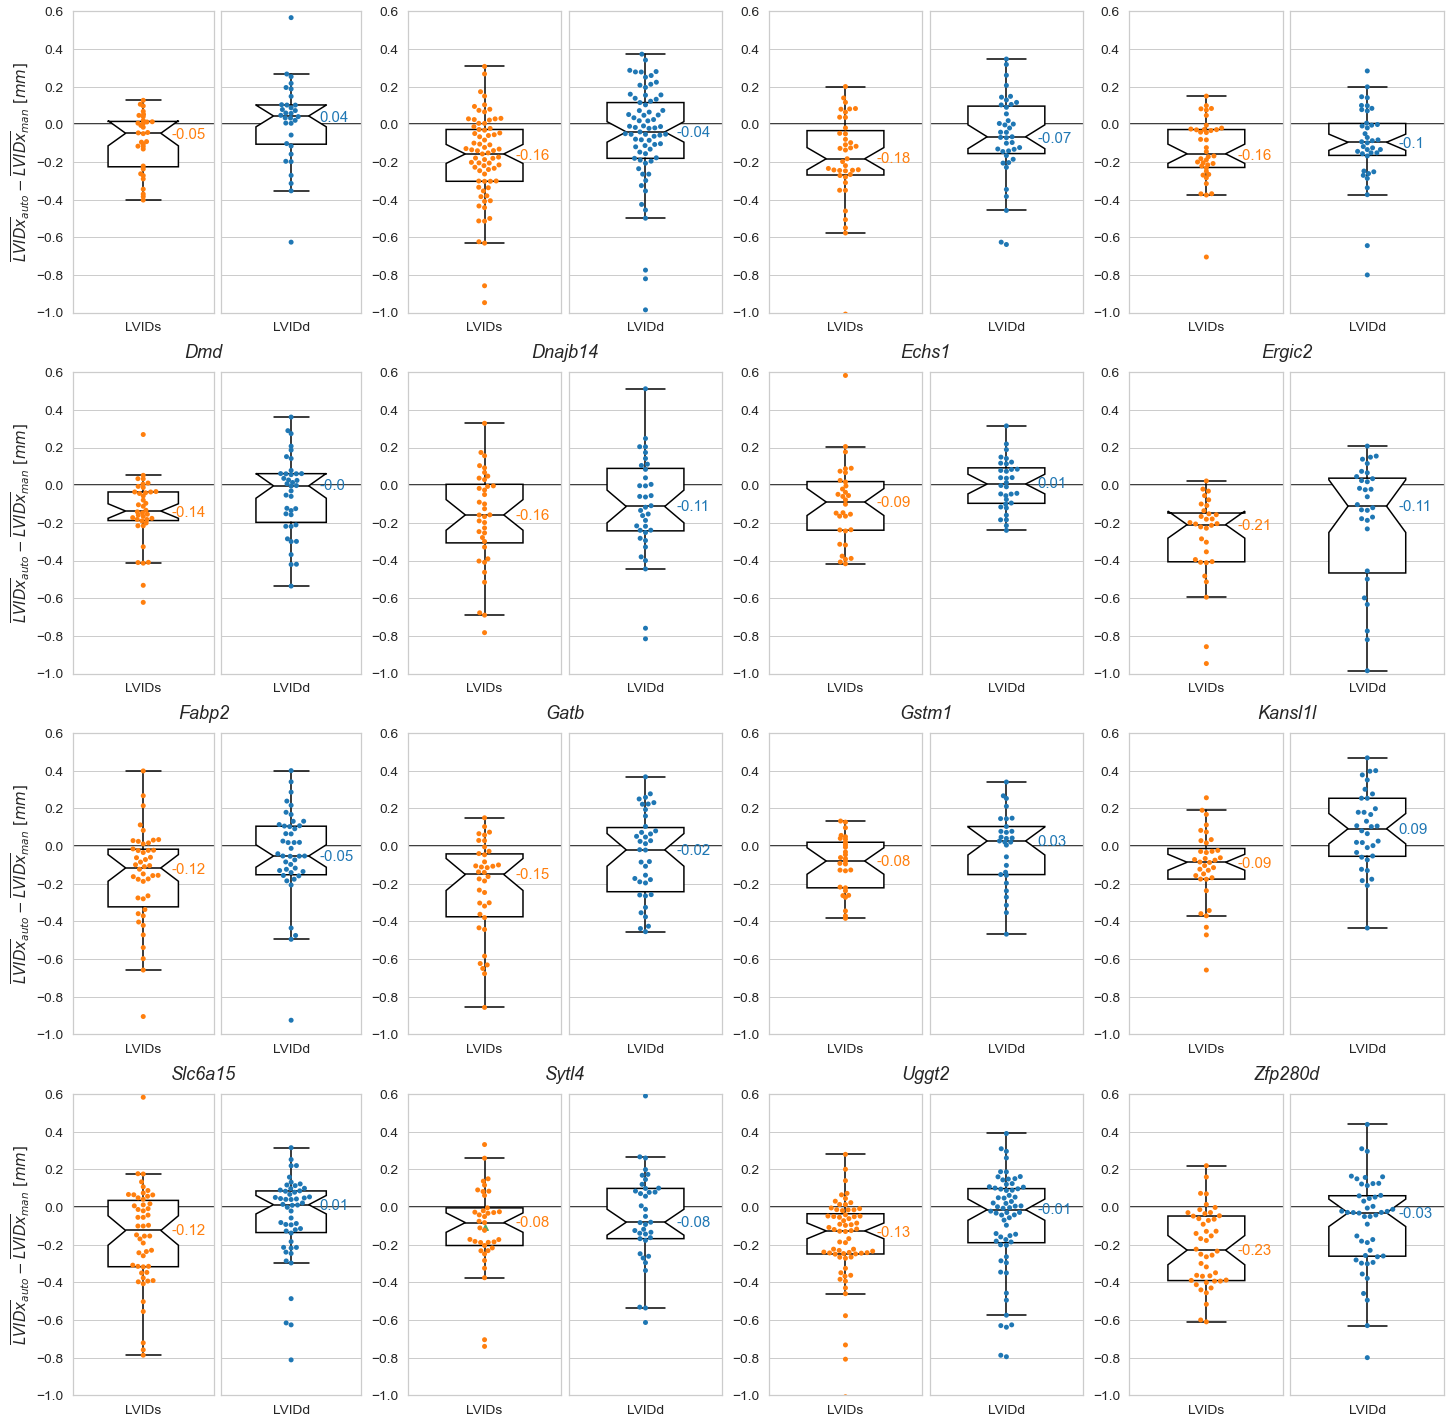

In [24]:
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
  
figure = plt.figure(figsize=(20,20), constrained_layout=True)
subfigures = figure.subfigures(4,4, wspace = 0.01, hspace = 0.01)
y_min = -1
y_max = 0.6


# Acnat2
subfigures[0,0].suptitle(genes[0], style = 'italic', x=0.55)
axs = subfigures[0,0].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[0]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[0]]['dif_LVIDs'], ax = axs[0], color= 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[0]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[0]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel(r'$\overline{LVIDx}_{auto} - \overline{LVIDx}_{man} \ [mm]$')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)

mean_s = mean_error_dist[mean_error_dist['study'] == genes[0]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[0]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Cisd1
subfigures[0,1].suptitle(genes[1], style = 'italic', x=0.55)
axs = subfigures[0,1].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[1]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[1]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[1]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[1]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[1]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[1]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Cmas
subfigures[0,2].suptitle(genes[2], style = 'italic', x=0.55)
axs = subfigures[0,2].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[2]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[2]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[2]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[2]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[2]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[2]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Cnot6l
subfigures[0,3].suptitle(genes[3], style = 'italic', x=0.55)
axs = subfigures[0,3].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[3]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[3]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[3]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[3]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[3]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[3]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Dmd
subfigures[1,0].suptitle(genes[4], style = 'italic', x=0.55)
axs = subfigures[1,0].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[4]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[4]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[4]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[4]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel(r'$\overline{LVIDx}_{auto} - \overline{LVIDx}_{man} \ [mm]$')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[4]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[4]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Dnajb14
subfigures[1,1].suptitle(genes[5], style = 'italic', x=0.55)
axs = subfigures[1,1].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[5]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[5]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[5]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[5]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[5]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[5]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Echs1
subfigures[1,2].suptitle(genes[6], style = 'italic', x=0.55)
axs = subfigures[1,2].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[6]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[6]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[6]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[6]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[6]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[6]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Ergic
subfigures[1,3].suptitle(genes[7], style = 'italic', x=0.55)
axs = subfigures[1,3].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[7]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[7]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[7]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[7]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[7]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[7]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Fabp2
subfigures[2,0].suptitle(genes[8], style = 'italic', x=0.55)
axs = subfigures[2,0].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[8]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[8]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[8]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[8]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel(r'$\overline{LVIDx}_{auto} - \overline{LVIDx}_{man} \ [mm]$')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[8]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[8]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Gatb
subfigures[2,1].suptitle(genes[9], style = 'italic', x=0.55)
axs = subfigures[2,1].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[9]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[9]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[9]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[9]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[9]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[9]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Gstm1
subfigures[2,2].suptitle(genes[10], style = 'italic', x=0.55)
axs = subfigures[2,2].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[10]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[10]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[10]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[10]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[10]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[10]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Kansl1l
subfigures[2,3].suptitle(genes[11], style = 'italic', x=0.55)
axs = subfigures[2,3].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[11]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[11]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[11]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[11]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[11]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[11]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Slc6a15
subfigures[3,0].suptitle(genes[12], style = 'italic', x=0.55)
axs = subfigures[3,0].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[12]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[12]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[12]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[12]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel(r'$\overline{LVIDx}_{auto} - \overline{LVIDx}_{man} \ [mm]$')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[12]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[12]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Sytl4
subfigures[3,1].suptitle(genes[13], style = 'italic', x=0.55)
axs = subfigures[3,1].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[13]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False, showmeans=True,)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[13]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[13]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[13]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[13]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[13]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Uggt2
subfigures[3,2].suptitle(genes[14], style = 'italic', x=0.55)
axs = subfigures[3,2].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[14]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[14]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[14]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[14]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[14]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[14]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

# Zfp280d
subfigures[3,3].suptitle(genes[15], style = 'italic', x=0.55)
axs = subfigures[3,3].subplots(1,2, gridspec_kw={'wspace' : 0.01}, sharey=True)

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[15]]['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[15]]['dif_LVIDs'], ax = axs[0], color = 'tab:orange')

sns.boxplot(y=mean_error_dist[mean_error_dist['study'] == genes[15]]['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=mean_error_dist[mean_error_dist['study'] == genes[15]]['dif_LVIDd'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
mean_s = mean_error_dist[mean_error_dist['study'] == genes[15]]['dif_LVIDs'].median().round(2)
mean_d = mean_error_dist[mean_error_dist['study'] == genes[15]]['dif_LVIDd'].median().round(2)
axs[0].text(0.2, mean_s-0.025, str(mean_s), color='tab:orange')
axs[1].text(0.2, mean_d-0.025, str(mean_d), color='tab:blue')
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))
      
plt.savefig('boxplots_per_gene.png')

In [25]:
measurements_per_mouse = pd.read_csv('data_filtered_plus_functional_parameter_plus_manual_measurements_all_lines.csv', low_memory=False)

In [26]:
measurements_per_mouse.groupby(by = 'mouse_id').count().describe()

,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437,110.222437
std,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961,78.102961
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
50%,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
75%,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
max,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000


## Korrelation Plot

### Pearson Coefficients

In [28]:
error_per_mouse = measurements_per_mouse.groupby(by = ['mouse_id']).mean()
error_per_mouse

,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDs_auto_quality_label,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
mouse_id,,,,,,,,,,,,,,,,,,,,,,,
30502528,2.707027,2.671661,0.924545,2.717029,677.287219,2.671661,0.958653,0.962146,27.419107,1.794400,93.385668,65.774803,22.6,90.30,59.93,2.76,1.14,-0.052973,2.733514,-0.215455,1.032272,3.085668,5.844803
30502540,2.613418,2.625508,0.968568,2.666107,711.293719,2.625508,0.954481,0.958572,25.222942,2.213428,91.350659,63.009630,24.6,90.20,59.19,2.51,1.10,0.103418,2.561709,-0.131432,1.034284,1.150659,3.819630
30502568,2.639535,2.659509,0.984992,2.688101,693.372172,2.659509,0.974466,0.974697,26.018289,2.173422,91.527250,62.580983,22.5,93.73,65.39,2.59,0.89,0.049535,2.614767,0.094992,0.937496,-2.202750,-2.809017
30502570,2.650404,2.653841,1.261122,2.653152,642.345860,2.653841,0.839071,0.825223,27.114576,4.378089,82.151107,51.346916,29.4,85.83,53.62,2.70,1.31,-0.049596,2.675202,-0.048878,1.285561,-3.678893,-2.273084
30502712,2.671683,3.344657,1.158003,3.292827,702.761051,3.344657,0.915388,0.928478,26.617316,3.142634,88.023929,56.548782,31.2,81.84,48.72,2.68,1.36,-0.008317,2.675841,-0.201997,1.259001,6.183929,7.828782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30523148,2.864408,3.065833,1.747181,3.050072,629.037685,3.065833,0.860722,0.860722,32.549146,9.604326,67.040215,37.848075,21.1,61.26,32.20,3.68,2.53,-0.815592,3.272204,-0.782819,2.138591,5.780215,5.648075
30523149,2.640066,1.784783,1.602705,1.766558,595.957758,1.784783,0.790481,0.798704,26.846333,7.779520,66.347032,37.710024,18.9,73.30,40.93,3.04,1.76,-0.399934,2.840033,-0.157295,1.681352,-6.952968,-3.219976
30523150,2.740483,2.548737,1.126770,2.540619,662.930592,2.548737,0.959130,0.957625,28.416856,3.025786,89.413357,58.902315,21.7,85.49,53.18,2.80,1.38,-0.059517,2.770242,-0.253230,1.253385,3.923357,5.722315


LinregressResult(slope=1.3429483766528443, intercept=-0.21885135577995762, rvalue=0.8409916533631259, pvalue=1.726475192046565e-139, stderr=0.038071491322688715, intercept_stderr=0.04448651979769063)
rvalue:  0.840991653363126  pvalue:  1.7264751920466905e-139
LinregressResult(slope=1.2860766655949663, intercept=-0.7032072045961217, rvalue=0.6898615994717189, pvalue=2.8402953884991576e-74, stderr=0.059470913970803646, intercept_stderr=0.1615112022512812)
rvalue:  0.6898615994717188  pvalue:  2.8402953884996847e-74


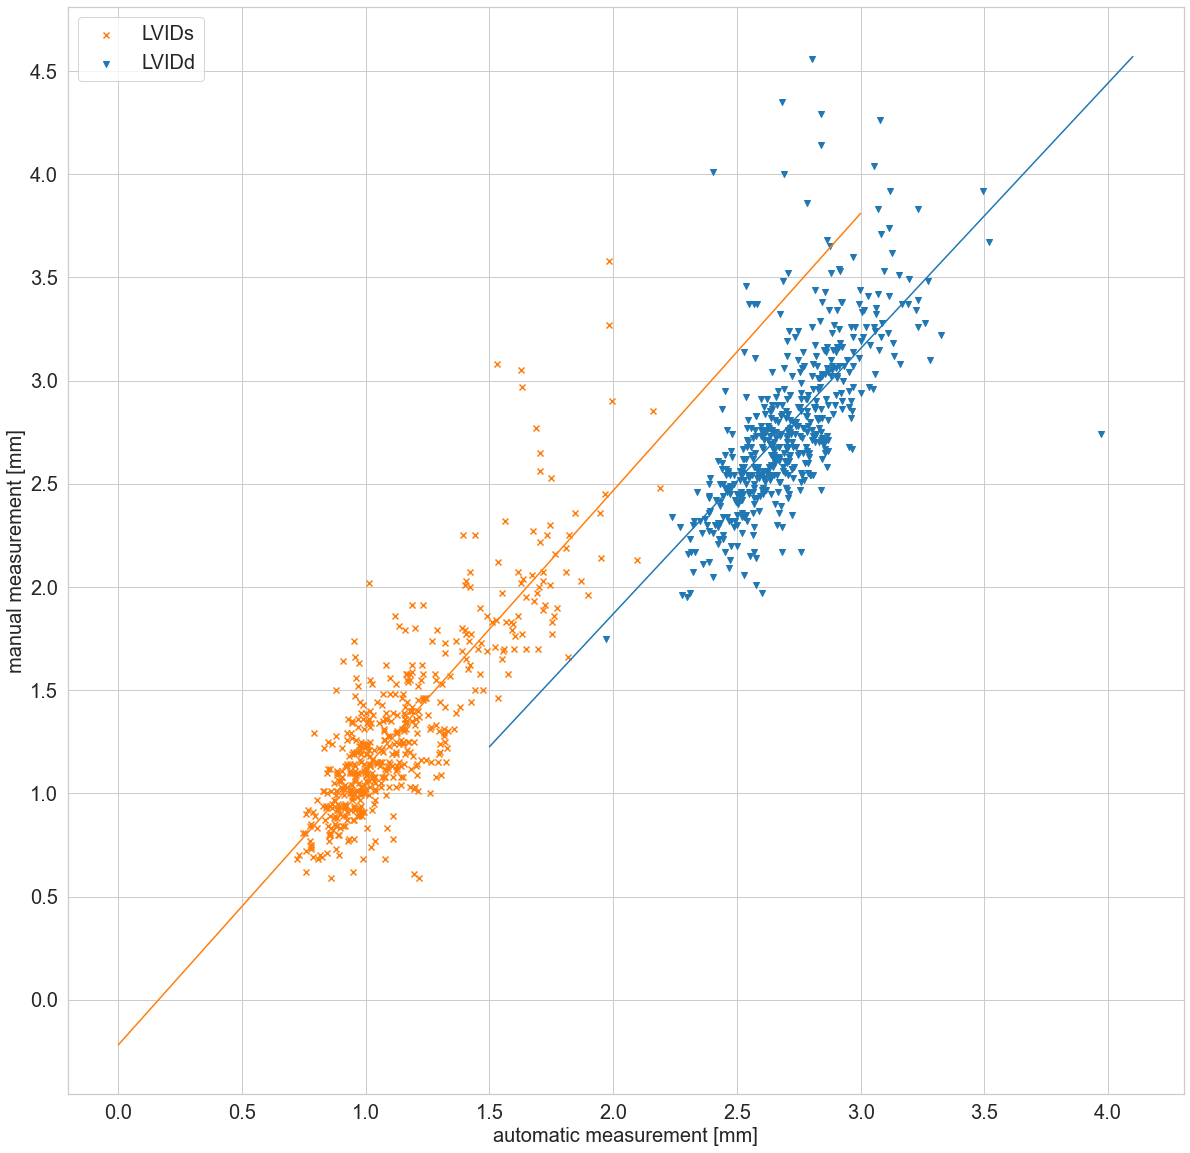

In [29]:
LVIDs_line_regression = linregress(error_per_mouse['LVIDs_auto'], error_per_mouse['LVIDs_manual'])
LVIDs_slope = LVIDs_line_regression[0]
LVIDs_i = LVIDs_line_regression[1]
r, p = stats.pearsonr(error_per_mouse['LVIDs_auto'], error_per_mouse['LVIDs_manual'])
print(LVIDs_line_regression)
print('rvalue: ', r, ' pvalue: ', p)

LVIDd_line_regression = linregress(error_per_mouse['LVIDd_auto'], error_per_mouse['LVIDd_manual'])
LVIDd_slope = LVIDd_line_regression[0]
LVIDd_i = LVIDd_line_regression[1]
r, p = stats.pearsonr(error_per_mouse['LVIDd_auto'], error_per_mouse['LVIDd_manual'])
print(LVIDd_line_regression)
print('rvalue: ', r, ' pvalue: ', p)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (20,20)) 

ax.scatter(error_per_mouse['LVIDs_auto'], error_per_mouse['LVIDs_manual'], color = 'tab:orange', label = 'LVIDs', marker = 'x')
x = x=np.linspace(0,3.0,25)
ax.plot(x, LVIDs_slope * x + LVIDs_i, color = 'tab:orange') 

ax.scatter(error_per_mouse['LVIDd_auto'], error_per_mouse['LVIDd_manual'], color = 'tab:blue', label = 'LVIDd', marker = 'v')
x = x=np.linspace(1.5,4.1,25)
ax.plot(x, LVIDd_slope * x + LVIDd_i, color = 'tab:blue') 

#x = x=np.linspace(0,5.5,50)
#ax.plot(x,x,color='tab:green')

ax.set_ylabel('manual measurement ' + r'[mm]', fontsize=20)
ax.set_xlabel('automatic measurement ' + r'[mm]', fontsize =20)
ax.set_yticks([0, 0.5,1, 1.5,2, 2.5,3, 3.5,4, 4.5])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
ax.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('scatter.png')

In [30]:
LVIDs_line_regression = linregress(error_per_mouse['LVIDs_auto'], error_per_mouse['LVIDs_manual'])
LVIDs_slope = LVIDs_line_regression[0]
LVIDs_i = LVIDs_line_regression[1]
r_s, p_s = stats.pearsonr(error_per_mouse['LVIDs_auto'], error_per_mouse['LVIDs_manual'])
#print(LVIDs_line_regression)
print('rvalue: ', r_s, ' pvalue: ', p_s)

LVIDd_line_regression = linregress(error_per_mouse['LVIDd_auto'], error_per_mouse['LVIDd_manual'])
LVIDd_slope = LVIDd_line_regression[0]
LVIDd_i = LVIDd_line_regression[1]
r_d, p_d = stats.pearsonr(error_per_mouse['LVIDd_auto'], error_per_mouse['LVIDd_manual'])
#print(LVIDd_line_regression)
print('rvalue: ', r_d, ' pvalue: ', p_d)

rvalue:  0.840991653363126  pvalue:  1.7264751920466905e-139
rvalue:  0.6898615994717188  pvalue:  2.8402953884996847e-74


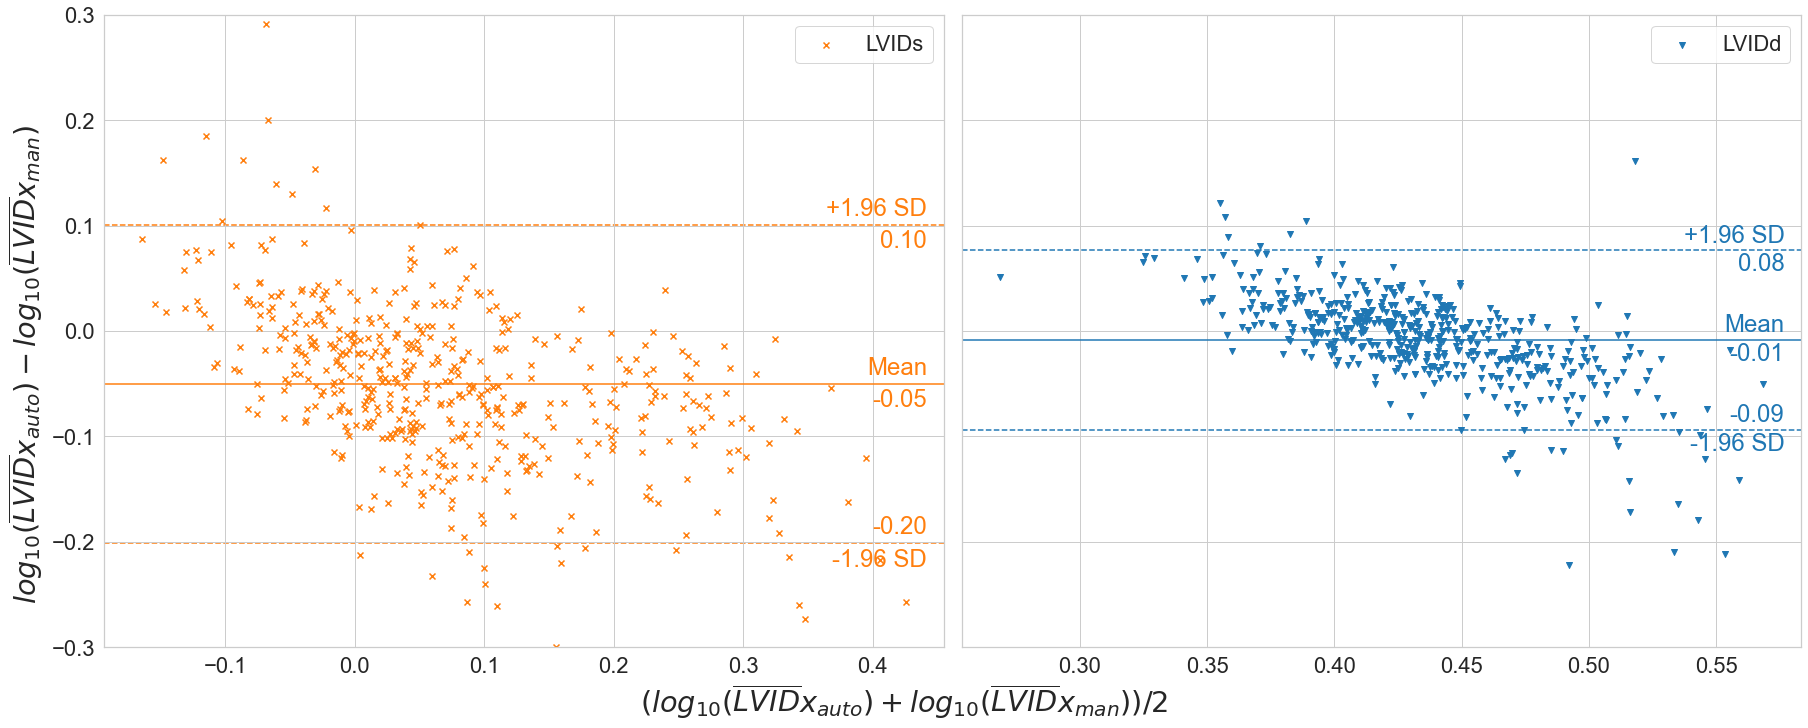

In [31]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

#figure = plt.figure(figsize=(30,15), constrained_layout=True)
fig, (ax0,ax1) = plt.subplots(1,2, figsize =(25,10), constrained_layout = True, sharey=True)

y_min = -0.3
y_max = 0.3

log_transform_per_mouse = error_per_mouse.groupby(by=['mouse_id']).mean()
log_transform_per_mouse = log_transform_per_mouse[['LVIDd_auto', 'LVIDs_auto', 'LVIDd_manual', 'LVIDs_manual']]
log_transform_per_mouse = np.log10(log_transform_per_mouse)
log_transform_per_mouse.reset_index(inplace=True)
log_transform_per_mouse['log_dif_LVIDd'] = [(log_transform_per_mouse['LVIDd_auto'][i] - log_transform_per_mouse['LVIDd_manual'][i]) for i in np.arange(len(log_transform_per_mouse))]
log_transform_per_mouse['log_dif_LVIDs'] = [(log_transform_per_mouse['LVIDs_auto'][i] - log_transform_per_mouse['LVIDs_manual'][i]) for i in np.arange(len(log_transform_per_mouse))]
log_transform_per_mouse['avg_LVIDd'] = [((log_transform_per_mouse['LVIDd_auto'][i] + log_transform_per_mouse['LVIDd_manual'][i]) / 2) for i in np.arange(len(log_transform_per_mouse))]
log_transform_per_mouse['avg_LVIDs'] = [((log_transform_per_mouse['LVIDs_auto'][i] + log_transform_per_mouse['LVIDs_manual'][i]) / 2) for i in np.arange(len(log_transform_per_mouse))]
        
n = len(log_transform_per_mouse)
        
# Calculate stats
mean_LVIDd = np.mean(log_transform_per_mouse['log_dif_LVIDd'])
mean_LVIDs = np.mean(log_transform_per_mouse['log_dif_LVIDs'])

std_LVIDd = np.std(log_transform_per_mouse['log_dif_LVIDd'])       
std_LVIDs = np.std(log_transform_per_mouse['log_dif_LVIDs'])

high_LVIDd = mean_LVIDd + 1.96 * std_LVIDd
high_LVIDs = mean_LVIDs + 1.96 * std_LVIDs

low_LVIDd = mean_LVIDd - 1.96 * std_LVIDd   
low_LVIDs = mean_LVIDs - 1.96 * std_LVIDs

mean_se_LVIDd = np.sqrt(std_LVIDd**2 / n)
mean_se_LVIDs = np.sqrt(std_LVIDs**2 / n)

high_low_se_LVIDd = np.sqrt(3 * std_LVIDd**2 / n)
high_low_se_LVIDs = np.sqrt(3 * std_LVIDs**2 / n)

ci_mean_LVIDd = stats.t.interval(0.95, n-1, loc=mean_LVIDd, scale=mean_se_LVIDd)
ci_mean_LVIDs = stats.t.interval(0.95, n-1, loc=mean_LVIDs, scale=mean_se_LVIDs)

ci_high_LVIDd = stats.t.interval(0.95, n-1, loc=high_LVIDd, scale=high_low_se_LVIDd)
ci_high_LVIDs = stats.t.interval(0.95, n-1, loc=high_LVIDs, scale=high_low_se_LVIDs)

ci_low_LVIDd = stats.t.interval(0.95, n-1, loc=low_LVIDd, scale=high_low_se_LVIDd)
ci_low_LVIDs = stats.t.interval(0.95, n-1, loc=low_LVIDs, scale=high_low_se_LVIDd)
        
# Plotting        
ax0.scatter(x=log_transform_per_mouse['avg_LVIDs'], y=log_transform_per_mouse['log_dif_LVIDs'], color = 'tab:orange', label = 'LVIDs', marker = 'x') 
ax1.scatter(x=log_transform_per_mouse['avg_LVIDd'], y=log_transform_per_mouse['log_dif_LVIDd'], color = 'tab:blue', label = 'LVIDd', marker = 'v')
        
ax0.axhline(y=mean_LVIDs, color= 'tab:orange', zorder=1)
ax1.axhline(y=mean_LVIDd, color= 'tab:blue', zorder=1)

# confidence intervals
ax0.axhline(y=high_LVIDs, color='tab:orange', linestyle= 'dashed', zorder=0)
ax1.axhline(y=high_LVIDd, color='tab:blue', linestyle= '--', zorder=0)

ax0.axhline(y=low_LVIDs, color='tab:orange', linestyle= 'dashed', zorder=0)
ax1.axhline(y=low_LVIDd, color='tab:blue', linestyle= '--', zorder=0)

#axs.axhspan(ci_mean_LVIDd[0], ci_mean_LVIDd[1], facecolor='tab:grey', alpha=0.2)
#axs.axhspan(ci_mean_LVIDs[0], ci_mean_LVIDs[1], facecolor='tab:grey', alpha=0.2)
#axs.axhspan(ci_high_LVIDd[0], ci_high_LVIDd[1], facecolor='tab:blue', alpha=0.2)
#axs.axhspan(ci_high_LVIDs[0], ci_high_LVIDs[1], facecolor='tab:blue', alpha=0.2)
#axs.axhspan(ci_low_LVIDd[0], ci_low_LVIDd[1], facecolor='tab:blue', alpha=0.2)
#axs.axhspan(ci_low_LVIDs[0], ci_low_LVIDs[1], facecolor='tab:blue', alpha=0.2)

loa_range_LVIDd = high_LVIDd - low_LVIDd
loa_range_LVIDs = high_LVIDs - low_LVIDs

offset_LVIDd = (loa_range_LVIDd / 100.0) * 1.5
offset_LVIDs = (loa_range_LVIDs / 100.0) * 1.5
trans_LVIDd = transforms.blended_transform_factory(ax1.transAxes, ax1.transData)
trans_LVIDs = transforms.blended_transform_factory(ax0.transAxes, ax0.transData)

xloc = 0.98



ax0.text(xloc, mean_LVIDs - offset_LVIDs, '%.2f' % mean_LVIDs, ha="right", va="top", transform=trans_LVIDs, color='tab:orange')
ax1.text(xloc, mean_LVIDd - offset_LVIDd, '%.2f' % mean_LVIDd, ha="right", va="top", transform=trans_LVIDd, color='tab:blue')

ax0.text(xloc, mean_LVIDs + offset_LVIDs, 'Mean', ha="right", va="bottom", transform=trans_LVIDs, color='tab:orange')
ax0.text(xloc, high_LVIDs + offset_LVIDs, '+%.2f SD' % 1.96, ha="right", va="bottom", transform=trans_LVIDs, color='tab:orange')
ax0.text(xloc, high_LVIDs - offset_LVIDs, '%.2f' % high_LVIDs, ha="right", va="top", transform=trans_LVIDs, color='tab:orange')
ax0.text(xloc, low_LVIDs - offset_LVIDs, '-%.2f SD' % 1.96, ha="right", va="top", transform=trans_LVIDs, color='tab:orange')
ax0.text(xloc, low_LVIDs + offset_LVIDs, '%.2f' % low_LVIDs, ha="right", va="bottom", transform=trans_LVIDs, color='tab:orange')
      
ax1.text(xloc, mean_LVIDd + offset_LVIDd, 'Mean', ha="right", va="bottom", transform=trans_LVIDd, color='tab:blue')
ax1.text(xloc, high_LVIDd + offset_LVIDd, '+%.2f SD' % 1.96, ha="right", va="bottom", transform=trans_LVIDd, color='tab:blue')
ax1.text(xloc, high_LVIDd - offset_LVIDd, '%.2f' % high_LVIDd, ha="right", va="top", transform=trans_LVIDd, color='tab:blue')
ax1.text(xloc, low_LVIDd - offset_LVIDd, '-%.2f SD' % 1.96, ha="right", va="top", transform=trans_LVIDd, color='tab:blue')
ax1.text(xloc, low_LVIDd + offset_LVIDd, '%.2f' % low_LVIDd, ha="right", va="bottom", transform=trans_LVIDd, color='tab:blue')

ax0.legend()
ax1.legend()
        
ax0.set(ylim=(y_min, y_max))
ax1.set(ylim=(y_min, y_max))
fig.supxlabel(r'$(log_{10}(\overline{LVID}x_{auto}) + log_{10}({\overline{LVID}x_{man}}))/2$')
fig.supylabel(r'$log_{10}(\overline{LVID}x_{auto}) - log_{10}({\overline{LVID}x_{man}})$')
#subfigures[1].supxlabel(r'$(log_{10}(LVIDx_{auto}) + log_{10}({LVIDx_{manual}}))/2$')
#subfigures[1].supylabel(r'$log_{10}(LVIDx_{auto}) - log_{10}({LVIDx_{manual}})$')
plt.savefig('BA.png')

In [33]:
error_per_mouse.median()

LVIDd_auto                    2.686579
LVIDd_auto_time               2.739929
LVIDs_auto                    1.055310
LVIDs_auto_time               2.733508
heart_rate_auto             693.229250
heart_rate_auto_time          2.739929
LVIDd_auto_quality_label      0.920498
LVIDs_auto_quality_label      0.917820
LV_Vold_auto                 27.082183
LV_Vols_auto                  2.611248
EF_auto                      90.452208
FS_auto                      60.856498
bw                           23.900000
EF_manual                    88.160000
FS_manual                    56.570000
LVIDd_manual                  2.710000
LVIDs_manual                  1.200000
dif_LVIDd                    -0.021362
mean_LVIDd                    2.701069
dif_LVIDs                    -0.131432
mean_LVIDs                    1.122399
dif_EF                        1.342745
dif_FS                        2.852353
dtype: float64

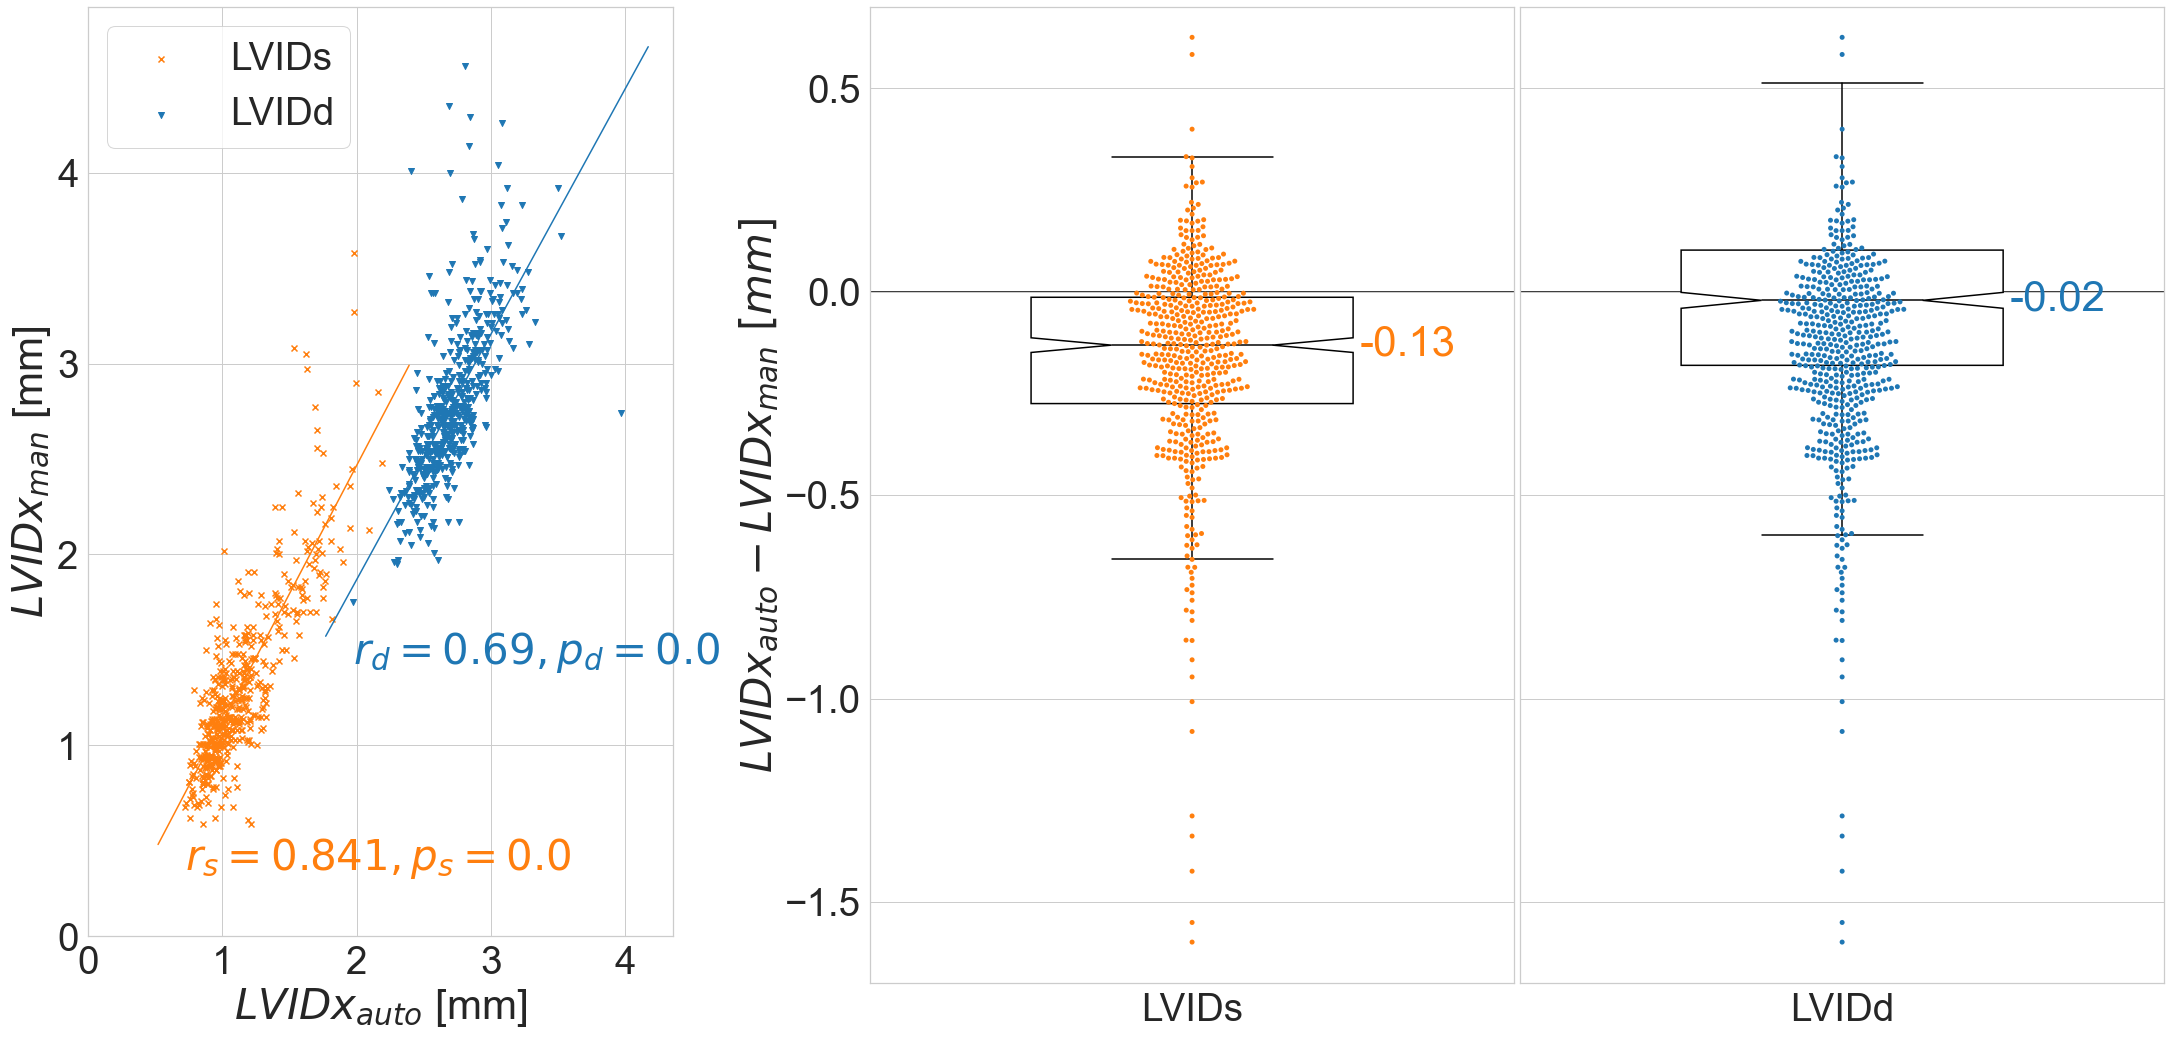

In [34]:
sns.set(font_scale=3.5)
sns.set_style("whitegrid")

figure = plt.figure(figsize=(30,15), constrained_layout=True)
subfigures = figure.subfigures(1,2, wspace = 0.01, hspace = 0.01, width_ratios=[1,2])
y_min = -1.7
y_max = 0.7

subfigures[0].suptitle('a. Pearson Correlations', horizontalalignment = 'left', x = 0.07, fontweight = 'bold')
axs = subfigures[0].subplots(1, gridspec_kw={'wspace' : 0.01}, sharey=True)

axs.scatter(error_per_mouse['LVIDs_auto'], error_per_mouse['LVIDs_manual'], color = 'tab:orange', label = 'LVIDs', marker = 'x')
axs.scatter(error_per_mouse['LVIDd_auto'], error_per_mouse['LVIDd_manual'], color = 'tab:blue', label = 'LVIDd', marker = 'v')

x = np.linspace(np.min(error_per_mouse['LVIDs_auto'])-0.2,np.max(error_per_mouse['LVIDs_auto'])+0.2,25)
axs.plot(x, LVIDs_slope * x + LVIDs_i, color = 'tab:orange') 
x = np.linspace(np.min(error_per_mouse['LVIDd_auto'])-0.2,np.max(error_per_mouse['LVIDd_auto'])+0.2,25)
axs.plot(x, LVIDd_slope * x + LVIDd_i, color = 'tab:blue')

tex_s = r'$r_s = ' + str(np.round(r_s,3)) + r', p_s = ' + str(np.round(p_s,3)) + '$'
tex_d = r'$r_d = ' + str(np.round(r_d,3)) + r', p_d = ' + str(np.round(p_d,3)) + '$'
axs.text(np.min(error_per_mouse['LVIDs_auto']), LVIDs_slope * np.min(error_per_mouse['LVIDs_auto']) + LVIDs_i -0.4 , tex_s, color='tab:orange')
axs.text(np.min(error_per_mouse['LVIDd_auto']), LVIDd_slope * np.min(error_per_mouse['LVIDd_auto']) + LVIDd_i -0.4, tex_d, color = 'tab:blue')

axs.set_ylabel(r'$LVIDx_{man}$ ' + r'[mm]')
axs.set_xlabel(r'$LVIDx_{auto}$ ' + r'[mm]')
axs.set_xticks([0, 1, 2, 3, 4])
axs.set_yticks([0, 1, 2, 3, 4])
axs.legend(loc='upper left')

subfigures[1].suptitle('b. Box Plots', horizontalalignment = 'left', x = 0.065, fontweight = 'bold')
axs = subfigures[1].subplots(1, 2, gridspec_kw={'wspace' : 0}, sharey=True)

sns.boxplot(y=error_per_mouse['dif_LVIDs'], ax = axs[0], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=error_per_mouse['dif_LVIDs'], ax = axs[0], color = 'tab:orange')       

sns.boxplot(y=error_per_mouse['dif_LVIDd'], ax = axs[1], color='white', boxprops={"edgecolor": "black"}, whiskerprops={"color": "black"}, medianprops={"color": "black"}, capprops={"color": "black"}, width=0.5, saturation= 1, notch = True, showfliers = False)
sns.swarmplot(y=error_per_mouse['dif_LVIDs'], ax = axs[1], color = 'tab:blue')

axs[0].set_xticklabels(['LVIDs'], rotation= 'horizontal')
axs[1].set_xticklabels(['LVIDd'], rotation= 'horizontal')
axs[0].set_ylabel(r'$LVIDx_{auto} - LVIDx_{man} \ [mm]$')
axs[1].set_ylabel('')
axs[0].axhline(y=0.0, color= 'black', zorder = 0)
axs[1].axhline(y=0.0, color= 'black', zorder = 0)
median_s = error_per_mouse['dif_LVIDs'].median().round(2)
median_d = error_per_mouse['dif_LVIDd'].median().round(2)
median_s_txt = str(median_s)
median_d_txt = str(median_d)
axs[0].text(0.26, median_s-0.025, median_s_txt, color='tab:orange')
axs[1].text(0.26, median_d-0.025, median_d_txt, color='tab:blue', zorder=5)
axs[0].set(ylim=(y_min, y_max))
axs[1].set(ylim=(y_min, y_max))

#subfigures[1].supxlabel(r'$ $')
#subfigures[1].supylabel(r'$LVIDx_{auto} - LVIDx_{man} \ [mm]$')
plt.savefig('combi_plot_boxplots.png')

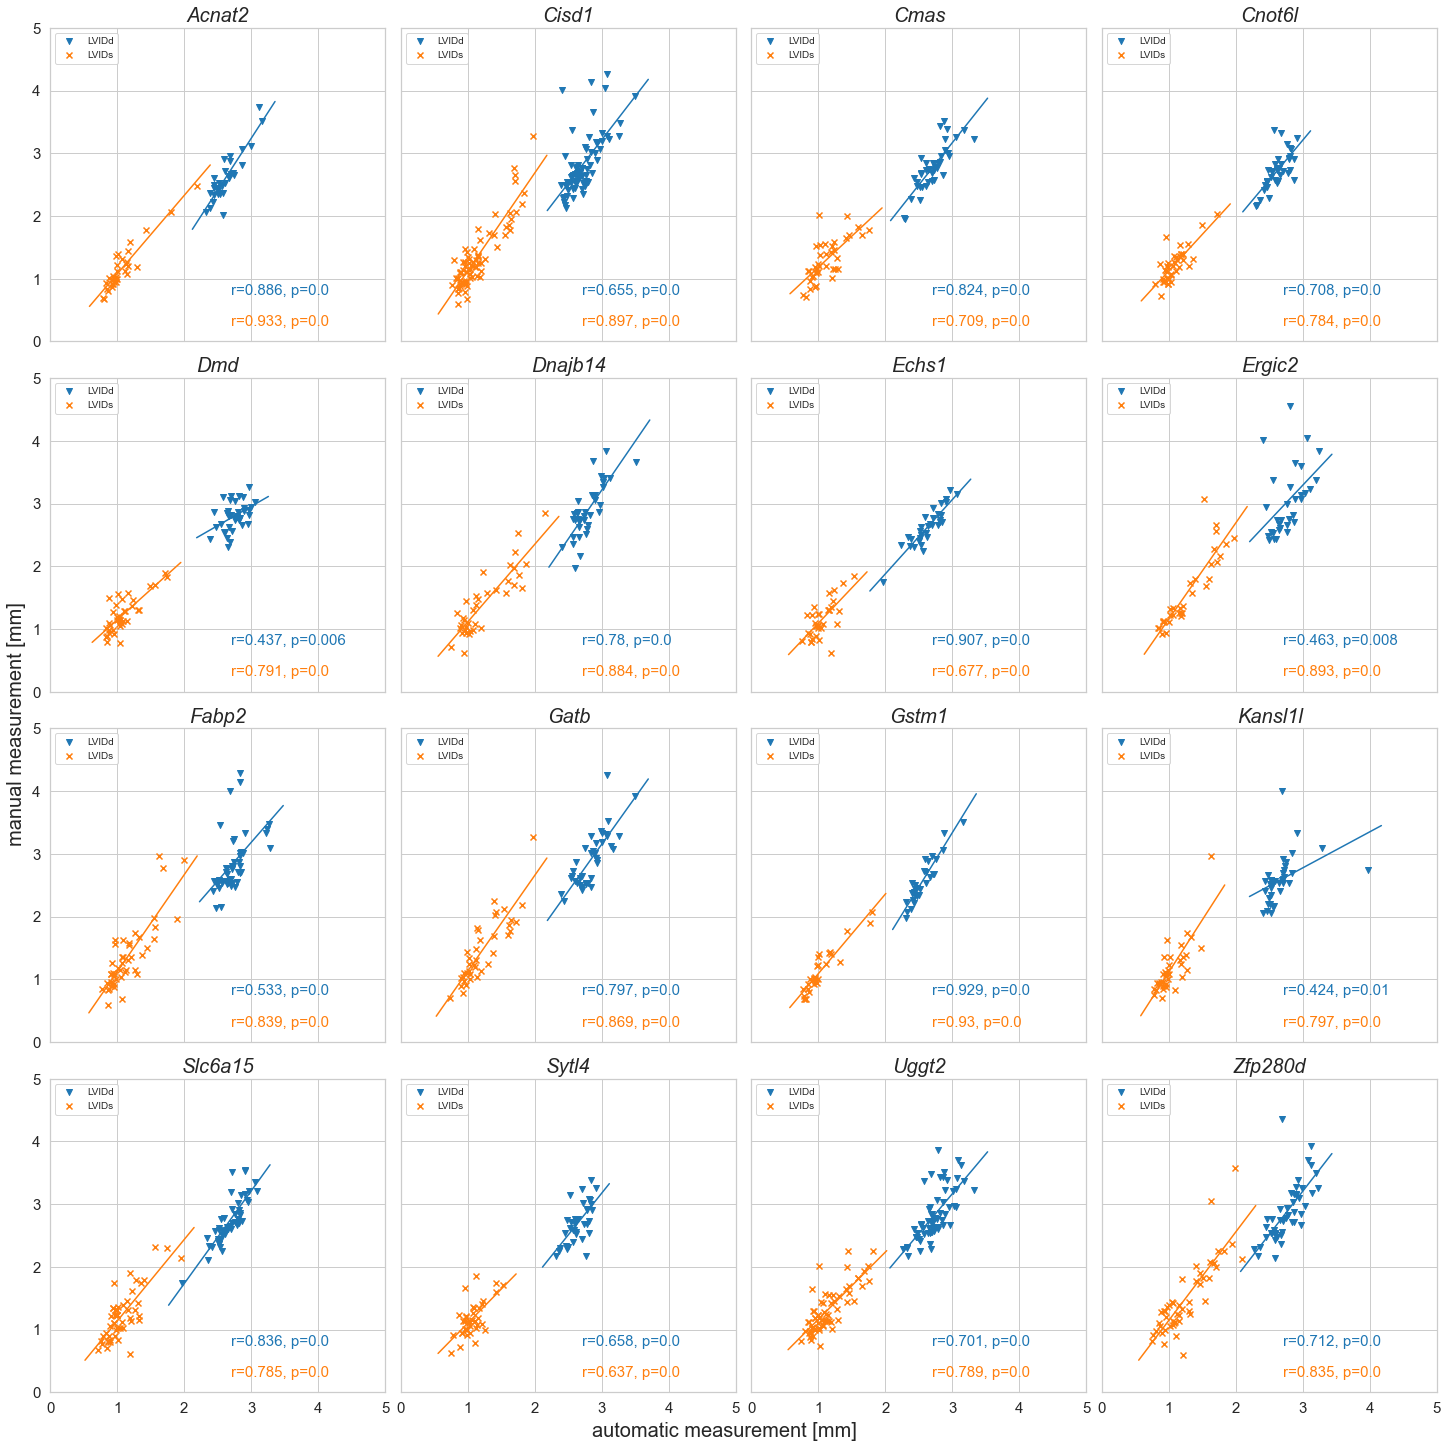

In [35]:
#num_genes = len(genes) #=15
sns.set_style("whitegrid")
figure, axes = plt.subplots(4,4,figsize=(20,20), constrained_layout=True, sharex=True, sharey=True)

counter=0
for i in range(4):
    for j in range(4):
        if counter==16:
            break
        line_error = mean_error_dist[mean_error_dist['study']==genes[counter]]
        LVIDs_line_regression = linregress(line_error['LVIDs_auto'], line_error['LVIDs_manual'])
        LVIDs_slope = LVIDs_line_regression[0]
        LVIDs_i = LVIDs_line_regression[1]
        r_s, p_s = stats.pearsonr(line_error['LVIDs_auto'], line_error['LVIDs_manual'])
        #print(genes[counter], r, p)

        LVIDd_line_regression = linregress(line_error['LVIDd_auto'], line_error['LVIDd_manual'])
        LVIDd_slope = LVIDd_line_regression[0]
        LVIDd_i = LVIDd_line_regression[1]
        r_d, p_d = stats.pearsonr(line_error['LVIDd_auto'], line_error['LVIDd_manual'])
        #print(genes[counter], r, p)

        axes[i, j].scatter(line_error['LVIDd_auto'], line_error['LVIDd_manual'], color = 'tab:blue', label = 'LVIDd', marker = 'v')
        axes[i, j].scatter(line_error['LVIDs_auto'], line_error['LVIDs_manual'], color = 'tab:orange', label = 'LVIDs', marker = 'x')
        x = np.linspace(np.min(line_error['LVIDs_auto'])-0.2,np.max(line_error['LVIDs_auto'])+0.2,25)
        axes[i,j].plot(x, LVIDs_slope * x + LVIDs_i, color = 'tab:orange') 
        x = np.linspace(np.min(line_error['LVIDd_auto'])-0.2,np.max(line_error['LVIDd_auto'])+0.2,25)
        axes[i,j].plot(x, LVIDd_slope * x + LVIDd_i, color = 'tab:blue')
        #x = np.linspace(0,4.5,25)
        #axes[i,j].plot(x,x, color='grey', alpha=0.2)
        axes[i,j].set_title(genes[counter], fontsize=20, style='italic' )
        tex_s = r'r=' + str(np.round(r_s,3)) + r', p=' + str(np.round(p_s,3))
        tex_d = r'r=' + str(np.round(r_d,3)) + r', p=' + str(np.round(p_d,3))
        axes[i,j].text(2.7, 0.25, tex_s, fontsize=15, color='tab:orange')
        axes[i,j].text(2.7, 0.75, tex_d, fontsize=15, color = 'tab:blue')
        axes[i,j].legend(fontsize=10, loc =  'upper left')
        axes[i,j].set_xticks([0, 1, 2, 3, 4, 5])
        axes[i,j].set_yticks([0, 1, 2, 3, 4, 5])
        axes[i,j].tick_params(labelsize=15)
        counter+=1

figure.supxlabel('automatic measurement ' + r'[mm]', fontsize =20)
figure.supylabel('manual measurement ' + r'[mm]', fontsize=20)

plt.savefig('scatter_per_gene.png')

## Wilcoxn-Rank-Sum-Test per line

### Aggregation of all results

In [36]:
filenames =[] 
for gene in genes:
    pval = os.path.join(gene, gene + '_p_values.csv')
    if filenames  is None:
        filenames = [pval]
    else: 
        filenames = np.append(filenames,pval)
print(filenames)

['Acnat2/Acnat2_p_values.csv' 'Cisd1/Cisd1_p_values.csv'
 'Cmas/Cmas_p_values.csv' 'Cnot6l/Cnot6l_p_values.csv'
 'Dmd/Dmd_p_values.csv' 'Dnajb14/Dnajb14_p_values.csv'
 'Echs1/Echs1_p_values.csv' 'Ergic2/Ergic2_p_values.csv'
 'Fabp2/Fabp2_p_values.csv' 'Gatb/Gatb_p_values.csv'
 'Gstm1/Gstm1_p_values.csv' 'Kansl1l/Kansl1l_p_values.csv'
 'Slc6a15/Slc6a15_p_values.csv' 'Sytl4/Sytl4_p_values.csv'
 'Uggt2/Uggt2_p_values.csv' 'Zfp280d/Zfp280d_p_values.csv']


### Creation of table with all information

In [37]:
p_values = pd.concat([pd.read_csv(f) for f in filenames ])
iterables = [genes, ["LVIDs", "LVIDd", "ejection fraction", "fractional shortening"]]
p_values.set_index(pd.MultiIndex.from_product(iterables, names=["Gene", "parameter"]), inplace=True)
p_values.drop(columns=['Unnamed: 0'], inplace= True)
p_values = p_values.round(3)
p_values

f manual  f automatic  m manual  m automatic
Gene    parameter                                                          
Acnat2  LVIDs                     0.798        0.382     0.248        0.083
        LVIDd                     0.574        0.878     0.248        0.105
        ejection fraction         0.798        0.195     0.279        0.195
        fractional shortening     0.878        0.161     0.279        0.234
Cisd1   LVIDs                     0.912        0.335     0.013        0.002
...                                 ...          ...       ...          ...
Uggt2   fractional shortening     0.710        0.132     0.021        0.386
Zfp280d LVIDs                     0.004        0.000     0.000        0.000
        LVIDd                     0.061        0.019     0.000        0.049
        ejection fraction         0.001        0.002     0.000        0.000
        fractional shortening     0.001        0.001     0.000        0.000

[64 rows x 4 columns]

### Visualisation of the information gain from  both tables

### Heatmap

In [39]:
cubix_palette = sns.choose_cubehelix_palette(as_cmap=True)

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

In [40]:
p_values = p_values.reset_index()
p_values

,Gene,parameter,f manual,f automatic,m manual,m automatic
0,Acnat2,LVIDs,0.798,0.382,0.248,0.083
1,Acnat2,LVIDd,0.574,0.878,0.248,0.105
2,Acnat2,ejection fraction,0.798,0.195,0.279,0.195
3,Acnat2,fractional shortening,0.878,0.161,0.279,0.234
4,Cisd1,LVIDs,0.912,0.335,0.013,0.002
...,...,...,...,...,...,...
59,Uggt2,fractional shortening,0.710,0.132,0.021,0.386
60,Zfp280d,LVIDs,0.004,0.000,0.000,0.000
61,Zfp280d,LVIDd,0.061,0.019,0.000,0.049
62,Zfp280d,ejection fraction,0.001,0.002,0.000,0.000


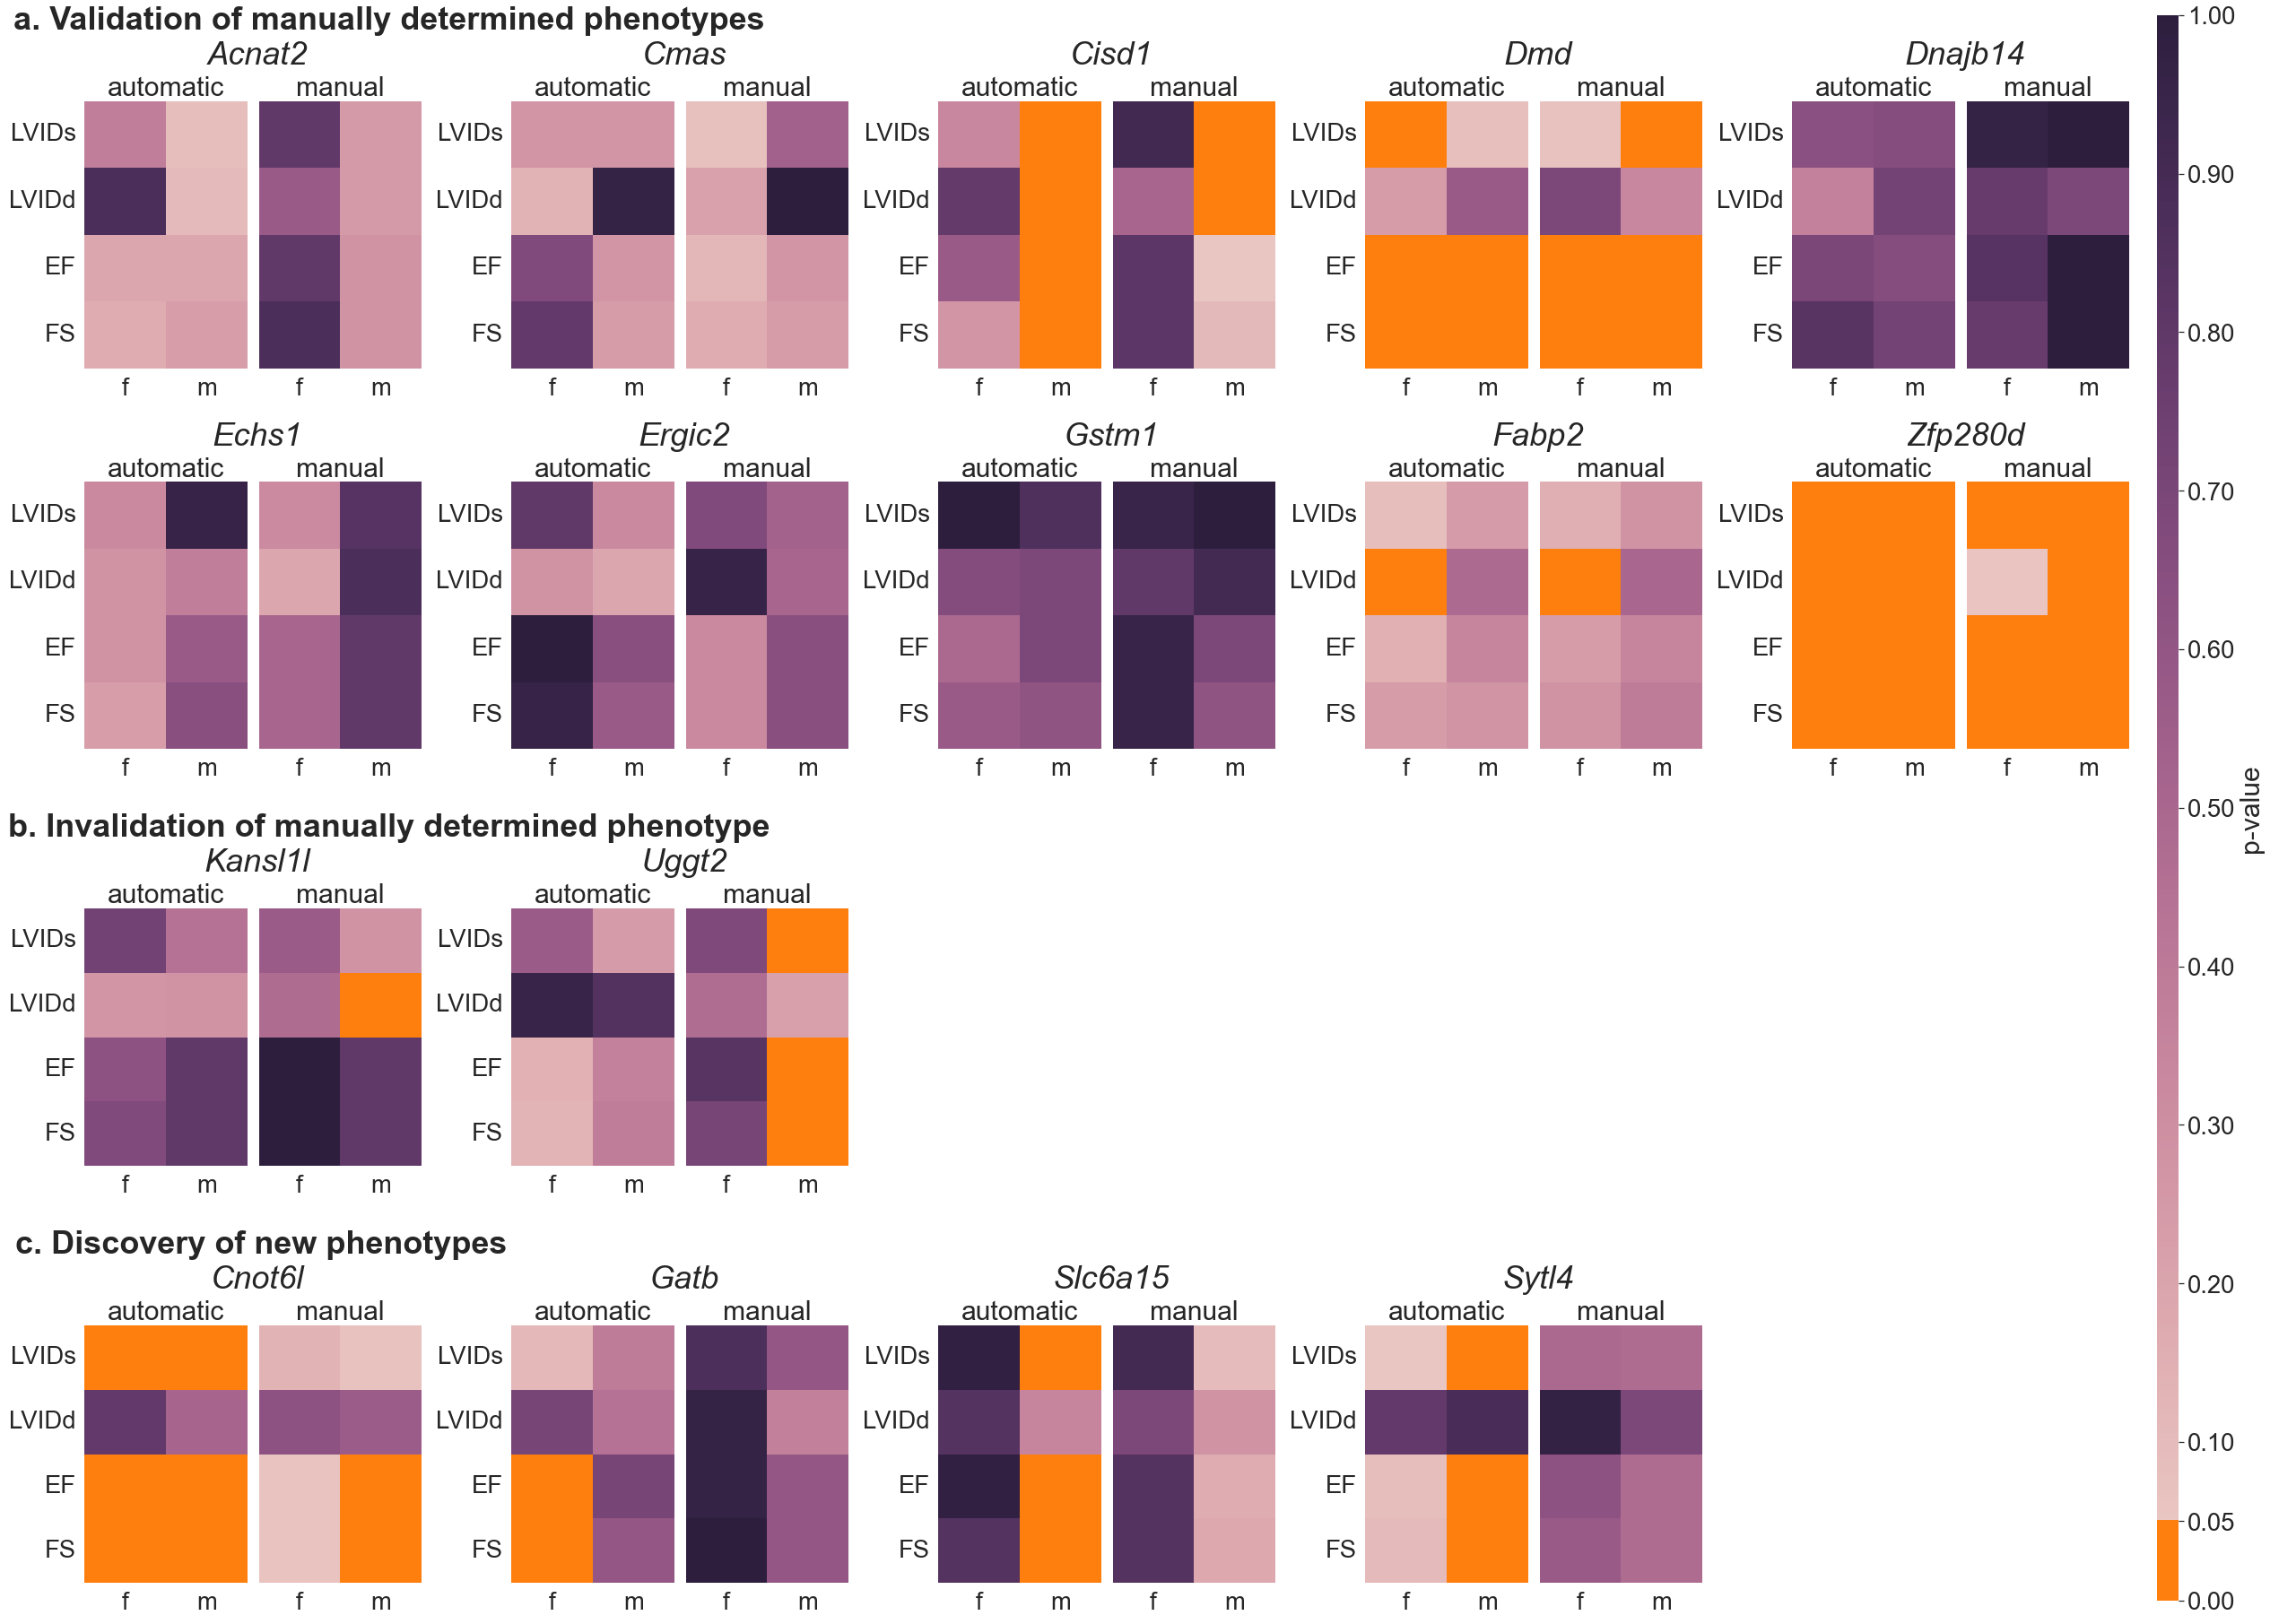

In [44]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

sns.set(font_scale=2.5)
viridis = cm.get_cmap(cubix_palette, 20)
newcolors = viridis(np.linspace(0, 1, 256))
orange = np.array([255/256, 127/256, 14/256, 1])
newcolors[:13, :] = orange
newcmp = ListedColormap(newcolors)
ticks = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

figure = plt.figure(figsize=(35,25), constrained_layout=True)
sub1 = figure.subfigures(1,2, width_ratios = [0.95,0.05])
subfigures = sub1[0].subfigures(3,1,wspace = 0.01, hspace = 0.05, height_ratios = [0.5,0.25, 0.25])

# Validation of manually-detected phenotypes
subfigures[0].suptitle('a. Validation of manually determined phenotypes', fontweight = 'bold', x = 0.18)
sub2 = subfigures[0].subfigures(2,1)

subfigs2 = sub2[0].subfigures(1,5)

# Acnat2
cbar_axt=sub1[1].subplots()

subfigs2[0].suptitle('Acnat2', style = 'italic', x = 0.6)
axs = subfigs2[0].subplots(1,2, gridspec_kw={'wspace': 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][0:4], cmap= newcmp, ax = axs[0], cbar = True, cbar_ax=cbar_axt, cbar_kws = {'orientation': 'vertical', 'ticks': ticks, 'label':'p-value'}, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][0:4], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
#cbar_axt.set_title('p', fontweight = 'bold')
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Cmas
subfigs2[1].suptitle('Cmas', style = 'italic', x=0.6)
axs = subfigs2[1].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][8:12], cmap= newcmp, ax = axs[0], cbar=False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][8:12], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Cisd1
subfigs2[2].suptitle(p_values['Gene'][4], style = 'italic', x=0.6)
axs = subfigs2[2].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][4:8], cmap= newcmp, ax = axs[0], cbar=False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][4:8], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Dmd
subfigs2[3].suptitle(p_values['Gene'][16], style = 'italic', x=0.6)
axs = subfigs2[3].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][16:20], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][16:20], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Dnajb14
subfigs2[4].suptitle('Dnajb14', style = 'italic', x=0.6)
axs = subfigs2[4].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][20:24], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][20:24], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

subfigs2 = sub2[1].subfigures(1,5)

# Echs1
subfigs2[0].suptitle(p_values['Gene'][24], style = 'italic', x=0.6)
axs = subfigs2[0].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][24:28], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][24:28], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Ergic
subfigs2[1].suptitle(p_values['Gene'][28], style = 'italic', x=0.6)
axs = subfigs2[1].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][28:32], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][28:32], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Gstm1
subfigs2[2].suptitle(p_values['Gene'][40], style = 'italic', x=0.6)
axs = subfigs2[2].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][40:44], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][40:44], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Fabp2
subfigs2[3].suptitle(p_values['Gene'][32], style = 'italic', x=0.6)
axs = subfigs2[3].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][32:36], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][32:36], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Zfp280d
subfigs2[4].suptitle(p_values['Gene'][60], style = 'italic', x=0.6)
axs = subfigs2[4].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][60:64], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][60:64], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

subfigures[1].suptitle('b. Invalidation of manually determined phenotype', fontweight = 'bold', x = 0.18)
subfigs3 = subfigures[1].subfigures(1,5)

# Kansl1l
subfigs3[0].suptitle(p_values['Gene'][44], style = 'italic', x=0.6)
axs = subfigs3[0].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][44:48], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][44:48], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Uggt2
subfigs3[1].suptitle(p_values['Gene'][56], style = 'italic', x=0.6)
axs = subfigs3[1].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][56:60], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][56:60], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

subfigures[2].suptitle('c. Discovery of new phenotypes', fontweight = 'bold', x = 0.12)
subfigs4 = subfigures[2].subfigures(1,5)

# Cnot6l
subfigs4[0].suptitle(p_values['Gene'][12], style = 'italic', x=0.6)
axs = subfigs4[0].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][12:16], cmap= newcmp, ax = axs[0], cbar=False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][12:16], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Gatb
subfigs4[1].suptitle(p_values['Gene'][36], style = 'italic', x=0.6)
axs = subfigs4[1].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][36:40], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][36:40], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Slc6a15
subfigs4[2].suptitle(p_values['Gene'][48], style = 'italic', x=0.6)
axs = subfigs4[2].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][48:52], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][48:52], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')

# Sytl4
subfigs4[3].suptitle(p_values['Gene'][52], style = 'italic', x=0.6)
axs = subfigs4[3].subplots(1,2, gridspec_kw={'wspace' : 0.01})
sns.heatmap(p_values[['f automatic', 'm automatic']][52:56], cmap= newcmp, ax = axs[0], cbar = False, vmin = 0, vmax=1)
sns.heatmap(p_values[['f manual', 'm manual']][52:56], cmap= newcmp, ax = axs[1], cbar = False, vmin = 0, vmax=1, yticklabels=False)
axs[0].set_title('automatic')
axs[1].set_title('manual')
axs[0].set_yticklabels(['LVIDs', 'LVIDd', 'EF', 'FS'], rotation = 'horizontal', va ='center', ha = 'right')
axs[0].set_xticklabels(['f', 'm'], rotation= 'horizontal')
axs[1].set_xticklabels(['f', 'm'], rotation= 'horizontal')
      
plt.savefig('p_values_ordered.png')

### Add styles to the tables

In [45]:
p_values = pd.concat([pd.read_csv(f) for f in filenames ])
iterables = [genes, ["LVIDs", "LVIDd", "ejection fraction", "fractional shortening"]]
p_values.set_index(pd.MultiIndex.from_product(iterables, names=["Gene", "parameter"]), inplace=True)
p_values.drop(columns=['Unnamed: 0'], inplace= True)
p_values = p_values.round(3)
p_values

f manual  f automatic  m manual  m automatic
Gene    parameter                                                          
Acnat2  LVIDs                     0.798        0.382     0.248        0.083
        LVIDd                     0.574        0.878     0.248        0.105
        ejection fraction         0.798        0.195     0.279        0.195
        fractional shortening     0.878        0.161     0.279        0.234
Cisd1   LVIDs                     0.912        0.335     0.013        0.002
...                                 ...          ...       ...          ...
Uggt2   fractional shortening     0.710        0.132     0.021        0.386
Zfp280d LVIDs                     0.004        0.000     0.000        0.000
        LVIDd                     0.061        0.019     0.000        0.049
        ejection fraction         0.001        0.002     0.000        0.000
        fractional shortening     0.001        0.001     0.000        0.000

[64 rows x 4 columns]

In [46]:
def color_p_values(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'coral' if val < 0.05 else ''
    return 'background-color: %s' % color

In [47]:
p_values_styled = p_values.style.applymap(color_p_values).format("{:1.3f}")
p_values_styled

In [48]:
filenames =[] 
for gene in genes:
    num = os.path.join(gene, gene + '_number_of_mice.csv')
    if filenames  is None:
        filenames = [num]
    else: 
        filenames = np.append(filenames,num)
print(filenames)

['Acnat2/Acnat2_number_of_mice.csv' 'Cisd1/Cisd1_number_of_mice.csv'
 'Cmas/Cmas_number_of_mice.csv' 'Cnot6l/Cnot6l_number_of_mice.csv'
 'Dmd/Dmd_number_of_mice.csv' 'Dnajb14/Dnajb14_number_of_mice.csv'
 'Echs1/Echs1_number_of_mice.csv' 'Ergic2/Ergic2_number_of_mice.csv'
 'Fabp2/Fabp2_number_of_mice.csv' 'Gatb/Gatb_number_of_mice.csv'
 'Gstm1/Gstm1_number_of_mice.csv' 'Kansl1l/Kansl1l_number_of_mice.csv'
 'Slc6a15/Slc6a15_number_of_mice.csv' 'Sytl4/Sytl4_number_of_mice.csv'
 'Uggt2/Uggt2_number_of_mice.csv' 'Zfp280d/Zfp280d_number_of_mice.csv']


In [49]:
num_stats = pd.concat([pd.read_csv(f) for f in filenames ])
iterables = iterables = [genes, ["f", 'm']]
num_stats.set_index(pd.MultiIndex.from_product(iterables, names=["Gene", "sex"]), inplace=True)
num_stats.drop(columns=['Unnamed: 0'], inplace= True)

In [50]:
num_stats

man con  auto con  man mut  auto mut
Gene    sex                                      
Acnat2  f          8         8        8         8
        m          8         8        8         8
Cisd1   f         29        29        8         8
        m         28        28        8         8
Cmas    f         10        10       10        10
        m         10        10        9         9
Cnot6l  f         10        10       10        10
        m         10        10        8         8
Dmd     f         10        10        8         8
        m         12        12        8         8
Dnajb14 f          9         8       10        10
        m          9         9        9         9
Echs1   f          8         8        8         8
        m          8         8        8         8
Ergic2  f          8         8        8         8
        m          8         8        8         8
Fabp2   f         16        16       10        10
        m         13        13        7         7
Gatb    f         10        10        9         9
        m         10        10        9         9
Gstm1   f          8         8        6         6
        m          8         8        7         7
Kansl1l f         10        10       10        10
        m          8         8        8         8
Slc6a15 f         16        16        9         9
        m         16        16        9         9
Sytl4   f         10        10       10        10
        m         10        10        7         7
Uggt2   f         23        23       10        10
        m         21        21       10        10
Zfp280d f         15        15        8         8
        m         17        17       10         8